<h1><center></center></h1>
<h1><center><font size = 10>Capstone Project</font></center></h1>
<h1><center>Final Report</center></h1>



<center>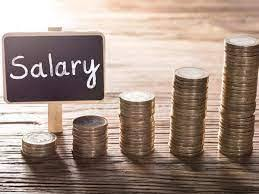</center>

<h1><center></center></h1>
<h2><center><bold>Fair Salary Prediction Model for Delta Ltd.: Eliminating Bias in Compensation Decisions</bold></center></h2>

# Project Notes - 1

## 1. Problem Understanding

### 1.1 Problem Statement

&nbsp;&nbsp;&nbsp;&nbsp;Salary allocation in organizations is often influenced by human judgment, leading to inconsistencies and potential biases. Factors such as experience, education, and past roles play a crucial role in determining compensation, but subjective decision-making can result in unfair salary discrepancies.

&nbsp;&nbsp;&nbsp;&nbsp;Delta Ltd. aims to address this issue by developing a Machine Learning (ML) model that predicts the expected salary (Expected_CTC) for new employees based on historical data. This model will ensure fair and unbiased compensation, maintaining consistency across similar profiles while minimizing manual intervention.

&nbsp;&nbsp;&nbsp;&nbsp;By leveraging data-driven insights, the company can eliminate pay discrimination, ensure salary transparency, and enhance employee trust in the hiring process.

Target variable: Expected_CTC <br>
Data dictionary: <br>

| Column Name                          | Description  |
|--------------------------------------|-------------|
| **IDX**                              | Index |
| **Applicant_ID**                     | Application ID |
| **Total_Experience**                 | Total industry experience |
| **Total_Experience_in_field_applied** | Total experience in the field applied for (past relevant work experience) |
| **Department**                        | Department name of current company |
| **Role**                              | Role in the current company |
| **Industry**                          | Industry name of current field |
| **Organization**                      | Organization name |
| **Designation**                       | Designation in current company |
| **Education**                         | Education |
| **Graduation_Specialization**         | Specialization subject in graduation |
| **University_Grad**                   | University or college in Graduation |
| **Passing_Year_Of_Graduation**        | Year of passing Graduation |
| **PG_Specialization**                 | Specialization subject in Post-Graduation |
| **University_PG**                     | University or college in Post-Graduation |
| **Passing_Year_Of_PG**                | Year of passing Post Graduation |
| **PHD_Specialization**                | Specialization subject in Post-Doctorate |
| **University_PHD**                    | University or college in Post-Doctorate |
| **Passing_Year_Of_PHD**               | Year of passing PHD |
| **Current_Location**                   | Current Location |
| **Preferred_location**                | Preferred location to work in the company applied |
| **Current_CTC**                        | Current CTC |
| **Inhand_Offer**                      | Holding any offer in hand (Y: Yes, N: No) |
| **Last_Appraisal_Rating**             | Last Appraisal Rating in current company |
| **No_Of_Companies_worked**            | No. of companies worked till date |
| **Number_of_Publications**            | Number of papers published |
| **Certifications**                    | Number of relevant certifications completed |
| **International_degree_any**          | Hold any international degree (1: Yes, 0: No) |
| **Expected_CTC**                      | Expected CTC (Final CTC offered by Delta Ltd.) |





### 1.2 Need for the Study

The need for this project arises due to:

1. Reducing Salary Bias – Ensuring salaries are based on objective criteria rather than subjective decisions.

2. Enhancing Fairness & Transparency – Employees with similar qualifications and experience should receive equitable pay.

3. Efficiency in HR Decision-Making – Automating salary recommendations reduces time and effort in salary negotiations.

4. Legal Compliance – Addressing potential pay equity concerns and adhering to fair pay regulations.

A robust ML model can help HR teams make data-driven salary decisions and reduce disputes related to compensation.

### 1.3 Business and Social Opportunity

Developing this salary prediction model presents significant opportunities:

- For Delta Ltd. (Business Impact):

  - Standardized pay structure improves hiring efficiency.

  - Reduced salary negotiations lead to faster recruitment cycles.

  - Strengthens employer reputation by promoting pay equity.

- For Employees (Social Impact):

  - Ensures fair compensation for all employees.

  - Reduces pay disparities based on gender, background, or negotiation skills.

  - Boosts employee satisfaction and retention.

By integrating AI-driven salary prediction, Delta Ltd. can establish a more structured, fair, and data-backed salary determination process, fostering an inclusive workplace.



## 2. Data Report

### 2.1 Understanding How Data Was Collected

&nbsp;&nbsp;&nbsp;&nbsp;The dataset contains information about applicants who applied to Delta Ltd. It captures details about their experience, education, certifications, and current employment to determine a fair expected salary. The data seems to have been collected from historical job applications submitted to the company. The frequency and methodology of collection are not explicitly mentioned, but it appears to be based on recruitment records.

### 2.2 Visual Inspection of Data (Rows, Columns, Descriptive Details)

#### 2.2.1 Load the Dataset and Check Basic Information

In [1]:
# Importing necessary libraries
# Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import scipy.stats as stats
from scipy.stats import pointbiserialr
from sklearn.impute import KNNImputer
from scipy.stats import yeojohnson

# Part 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
# Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
file_path = "drive/My Drive/Great Learning PGP/Capstone Project/HR Data_Capstone Project/expected_ctc.csv"
df = pd.read_csv(file_path)
df_original = df.copy()

# Display basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

1. **Significant Missing Data in Education & Job Details** – Graduation, PG, and PhD details are incomplete, along with department and role information, which may impact salary predictions.  

2. **Industry & Experience Data Gaps** – Some applicants lack industry, organization, and designation details, affecting job role-based salary insights.  

3. **Complete Salary Data Available** – All applicants have Current_CTC and Expected_CTC, making salary prediction viable, while "Inhand_Offer" could influence expected salaries.

#### 2.2.2 Check Number of Rows and Columns

In [4]:
# Number of rows and columns
df.shape

(25000, 29)

The dataset contains **25,000 rows** and **29 columns**, indicating a large dataset with multiple features for salary prediction analysis.

#### 2.2.3 Display First Few Rows

In [5]:
# Display first 5 rows in transpose
df.head().T

,0,1,2,3,4
IDX,1,2,3,4,5
Applicant_ID,22753,51087,38413,11501,58941
Total_Experience,0,23,21,15,10
Total_Experience_in_field_applied,0,14,12,8,5
Department,NaN,HR,Top Management,Banking,Sales
Role,NaN,Consultant,Consultant,Financial Analyst,Project Manager
Industry,NaN,Analytics,Training,Aviation,Insurance
Organization,NaN,H,J,F,E
Designation,NaN,HR,NaN,HR,Medical Officer
Education,PG,Doctorate,Doctorate,Doctorate,Grad


### 2.3 Understanding of Attributes (Variable Info, Renaming if Required)

#### 2.3.1 Summary Statistics for Numerical Features

In [6]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


1. **Experience Distribution** – The average total experience is **12.5 years**, while experience in the applied field is **6.26 years**, indicating many candidates have diverse backgrounds outside their target field.  

2. **Salary Trends** – The **mean Current CTC is ~1.76M**, while the **mean Expected CTC is ~2.25M**, suggesting a general expectation of a **~28% salary hike**.  

3. **Education & Certifications** – Only **8.2%** of applicants hold an international degree, and the median number of certifications is **zero**, which may impact salary negotiation power.

#### 2.3.2 Check for Missing Values

In [7]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Graduation_Specialization,6180
University_Grad,6180
Passing_Year_Of_Graduation,6180
PG_Specialization,7692
University_PG,7692


1. **Education Details Have the Most Missing Values** – **PhD (~47.5%)**, **Post-Graduation (~30.8%)**, and **Graduation (~24.7%)** details are incomplete, affecting the ability to use education as a predictor for salary.  

2. **Job Role & Industry Gaps** – Missing values in **Department (11%)**, **Role (4%)**, and **Designation (12.5%)** may impact industry-specific salary analysis.  

3. **Last Appraisal Rating is Missing for ~3.6% of Applicants** – This could reduce the reliability of performance-based salary adjustments.

#### 2.3.3 Checking Unique Values in Categorical Variables

In [8]:
# Identify categorical columns and count unique values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Department: 12 unique values
Role: 24 unique values
Industry: 11 unique values
Organization: 16 unique values
Designation: 18 unique values
Education: 4 unique values
Graduation_Specialization: 11 unique values
University_Grad: 13 unique values
PG_Specialization: 11 unique values
University_PG: 13 unique values
PHD_Specialization: 11 unique values
University_PHD: 13 unique values
Curent_Location: 15 unique values
Preferred_location: 15 unique values
Inhand_Offer: 2 unique values
Last_Appraisal_Rating: 5 unique values


In [9]:
df["Education"].unique()

array(['PG', 'Doctorate', 'Grad', 'Under Grad'], dtype=object)

Let us consider under grad and grad as same value

In [10]:
df["Education"] = df["Education"].replace("Under Grad", "Grad")

#### 2.3.4 Checking for Zero or Unusual Values in Key Columns

In [11]:
# Checking for unusual zero values in key columns
zero_check_cols = ["Expected_CTC", "No_Of_Companies_worked", "Number_of_Publications", "Certifications"]
for col in zero_check_cols:
    print(f"{col} has {df[df[col] == 0].shape[0]} zero values")

# Identifying freshers (Total_Experience = 0) with a valid zero Current_CTC
freshers = df[df["Total_Experience"] == 0]
print(f"Total Freshers: {freshers.shape[0]}")

# Checking for cases where Expected_CTC is zero (should not happen)
invalid_expected_ctc = df[df["Expected_CTC"] == 0]
print(f"Invalid Expected_CTC Cases: {invalid_expected_ctc.shape[0]}")

# Checking for outliers in Number_of_Publications and Certifications
df[["Number_of_Publications", "Certifications"]].describe(percentiles=[0.95, 0.99])


Expected_CTC has 0 zero values
No_Of_Companies_worked has 908 zero values
Number_of_Publications has 2912 zero values
Certifications has 15215 zero values
Total Freshers: 908
Invalid Expected_CTC Cases: 0


,Number_of_Publications,Certifications
count,25000.000000,25000.000000
mean,4.089040,0.773680
std,2.606612,1.199449
min,0.000000,0.000000
50%,4.000000,0.000000
95%,8.000000,3.000000
99%,8.000000,5.000000
max,8.000000,5.000000


1. **Expected_CTC has no zero values**, confirming all applicants have a salary expectation, making the prediction model viable.  

2. **Freshers (908 applicants) have No_Of_Companies_worked = 0**, which aligns with their Total_Experience = 0, while **Number_of_Publications (2912 applicants) and Certifications (15,215 applicants) have zero values**, indicating these may not be common for all job roles.  

3. **No extreme outliers in Publications (max = 8) or Certifications (max = 5)** based on the 99th percentile, but further analysis is needed to understand their impact on salary.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis

We analyze the distribution of continuous variables and the category distribution of categorical variables.

#### 3.1.1 Distribution of Continuous Variables

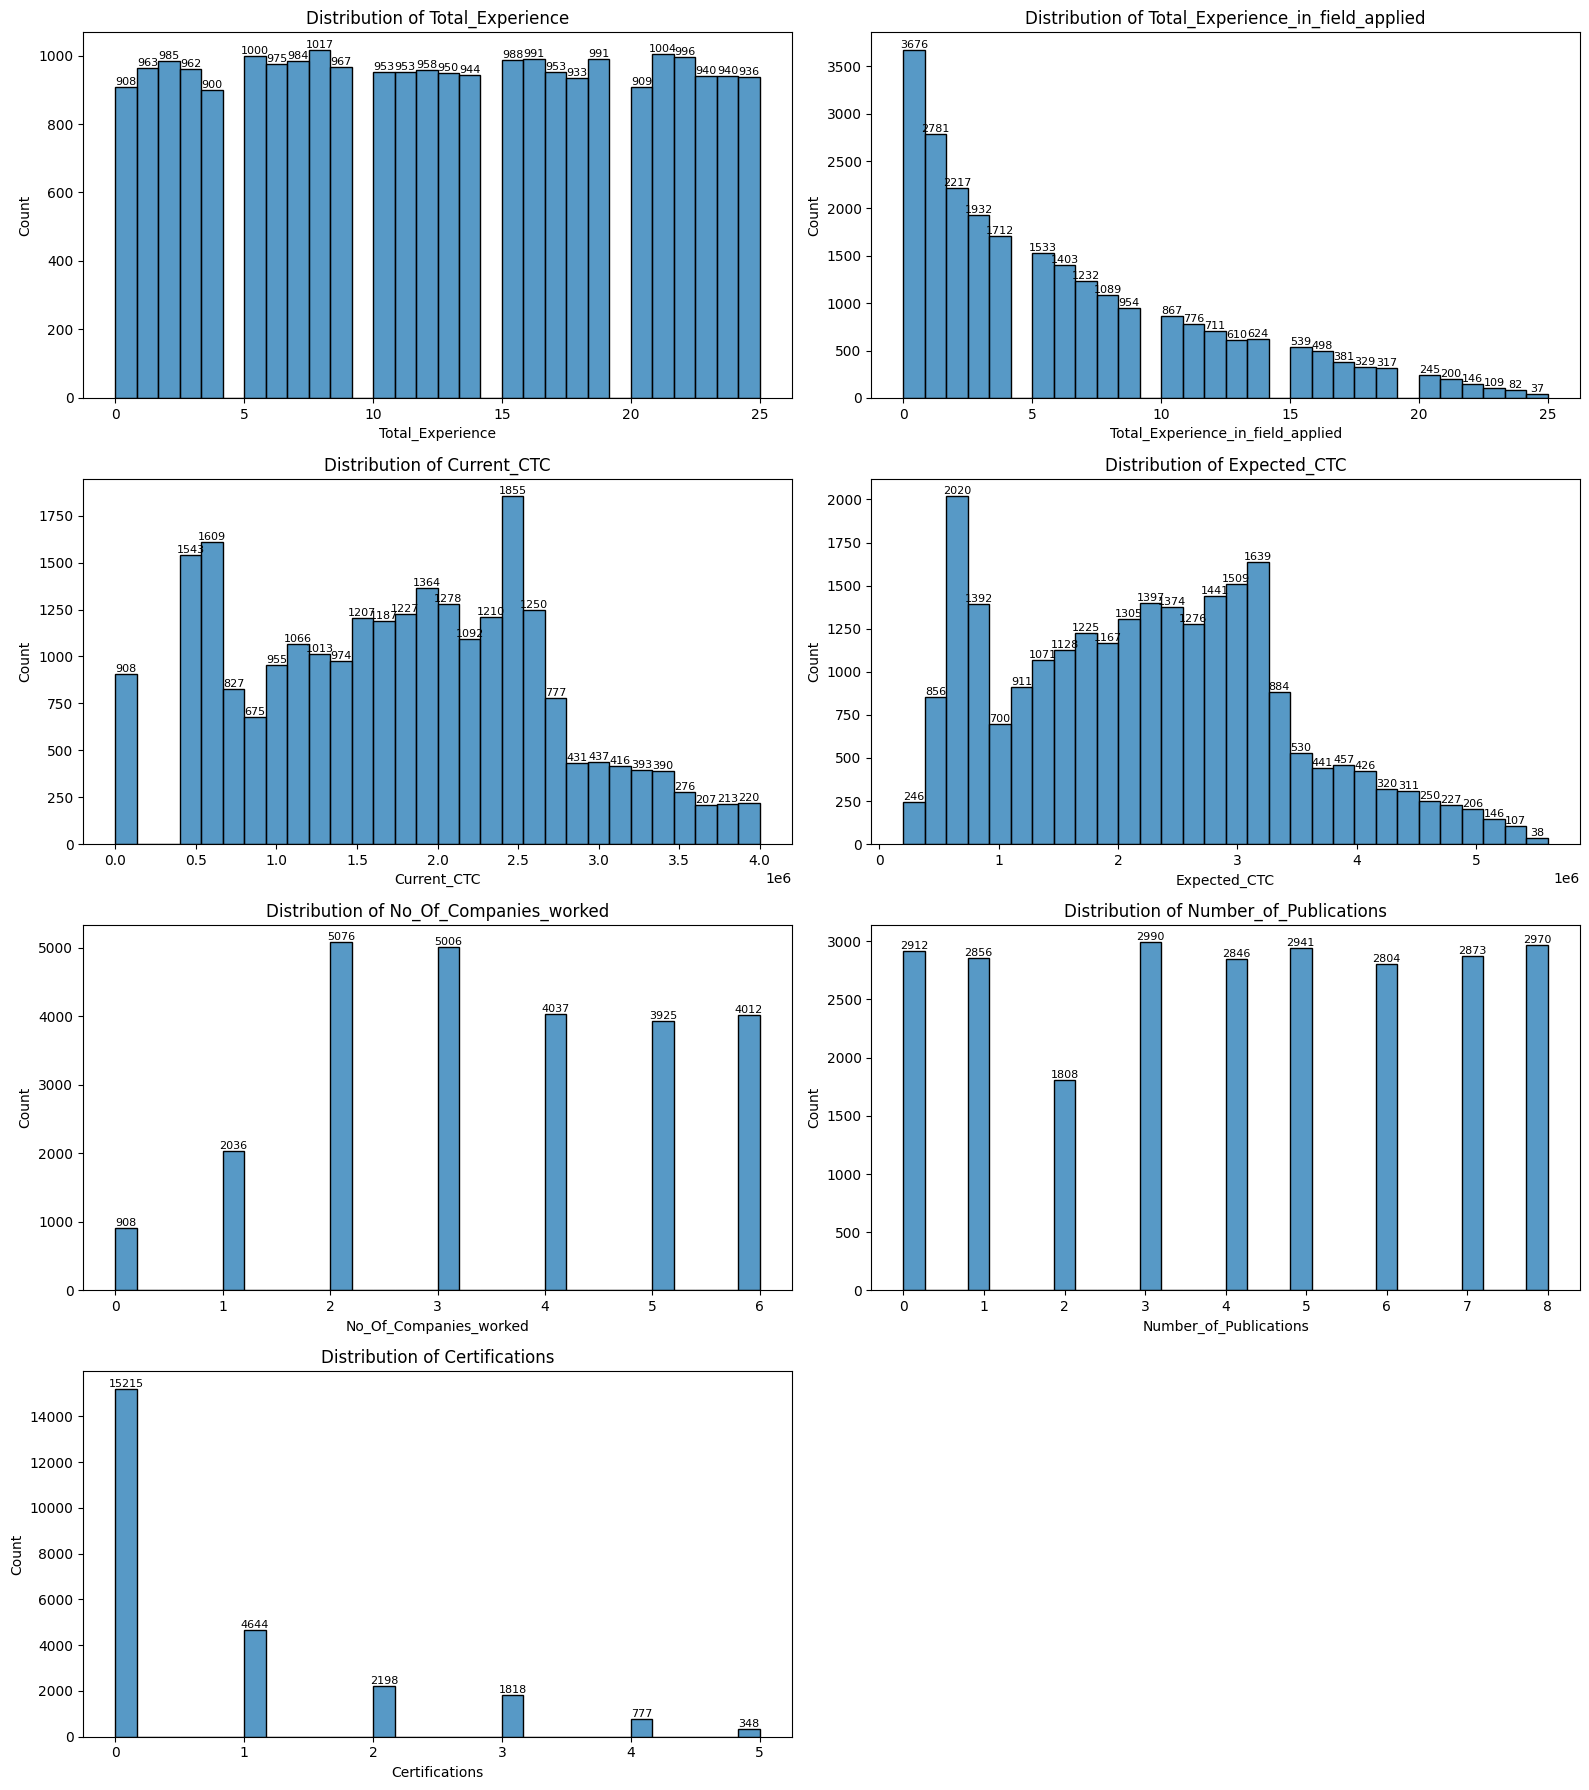

In [14]:
# Selecting continuous variables
continuous_cols = ["Total_Experience", "Total_Experience_in_field_applied", "Current_CTC", "Expected_CTC",
                   "No_Of_Companies_worked", "Number_of_Publications", "Certifications"]

# Plotting distribution with values on top
plt.figure(figsize=(16, 18))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot((len(continuous_cols) + 1) // 2, 2, i)
    ax = sns.histplot(df[col], bins=30, kde=False)
    plt.title(f"Distribution of {col}")

    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


1. **Right-Skewed Distributions**: Most numerical features (Total Experience, Current CTC, Expected CTC) are right-skewed, indicating a majority of applicants with lower values and a few high-value outliers.

2. **Publications & Certifications Are Limited**: A significant portion of applicants has zero publications or certifications, suggesting these are not universal factors in salary determination.

3. **Experience vs. Salary Trends**: Applicants generally expect a ~28% salary hike, with diverse experience levels across industries, leading to varied salary expectations.

#### 3.1.2: Univariate Analysis for Categorical Variables

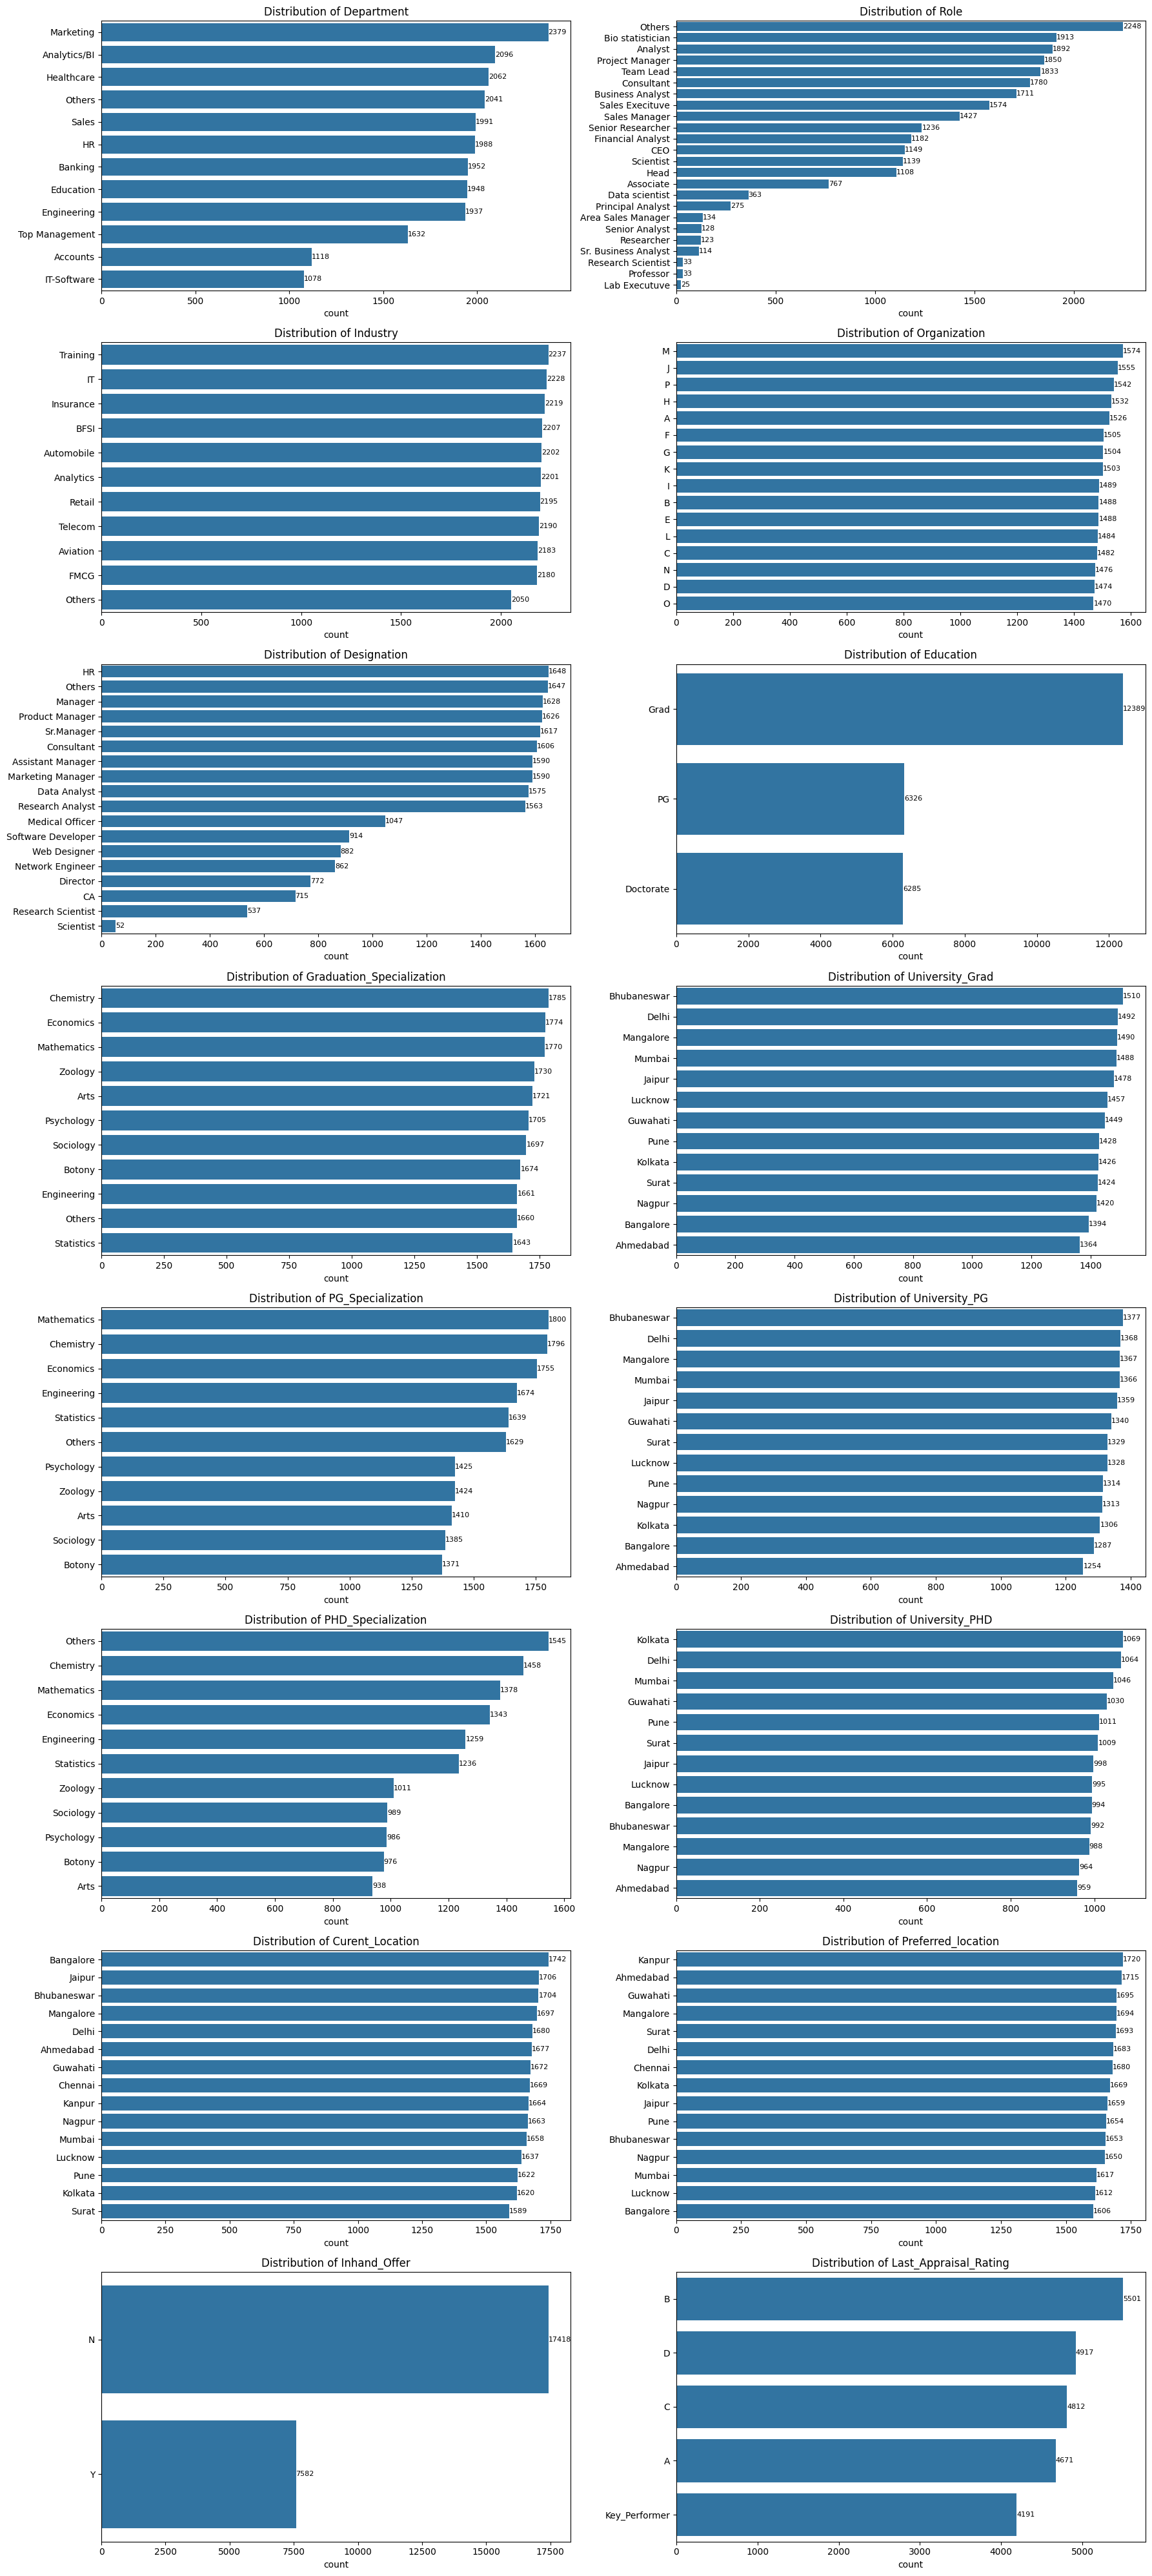

In [16]:
# Identifying categorical columns
categorical_columns = [
    "Department", "Role", "Industry", "Organization", "Designation", "Education",
    "Graduation_Specialization", "University_Grad", "PG_Specialization", "University_PG",
    "PHD_Specialization", "University_PHD", "Curent_Location", "Preferred_location",
    "Inhand_Offer", "Last_Appraisal_Rating"
]

# Define layout
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("")  # Remove y-axis label for neatness

    # Add value labels to bars
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.annotate(f'{int(width)}',
                        (width, p.get_y() + p.get_height() / 2),
                        ha='left', va='center', fontsize=8, color='black')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



1. **Department & Role Distribution** – **Marketing, Analytics/BI, and Healthcare** are the most common departments, while **Business Analyst and Project Manager** are frequent roles. **IT Software and Actuarial** roles have lower representation.  

2. **Industry & Organization Trends** – **Training, IT, and Insurance** industries dominate. Organizations labeled **A, B, and C** have the highest applicant counts with a fairly even distribution.  

3. **Education & Specialization** – “Grad” dominates education levels; Chemistry, Economics, and Mathematics lead in Graduation, with PG emphasizing Engineering and Psychology, while PhD shifts toward Chemistry and Mathematics over Engineering.

4. **Location Preferences** – **Bangalore, Delhi, and Mumbai** are both popular current and preferred locations, indicating strong industry presence in these cities.  

5. **Employment Status & Appraisal Ratings** – **Most applicants do not have an in-hand offer**, and **Key Performer ratings are the most frequent**, followed by **A and B ratings.**  


### Step 3.2: Bivariate Analysis (Numerical-Numerical Variables)

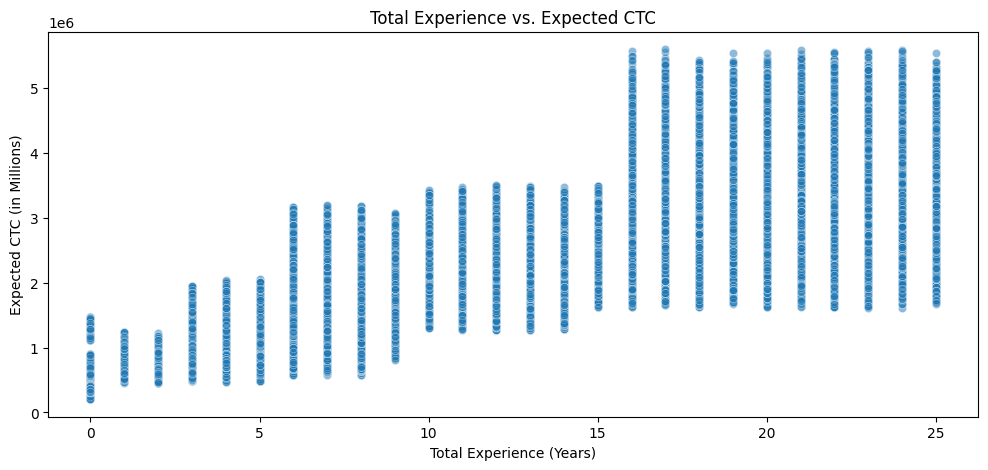

In [ ]:
# Scatter plot: Experience vs. Salary
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Total_Experience'], y=df['Expected_CTC'], alpha=0.5)
plt.title("Total Experience vs. Expected CTC")
plt.xlabel("Total Experience (Years)")
plt.ylabel("Expected CTC (in Millions)")
plt.show()


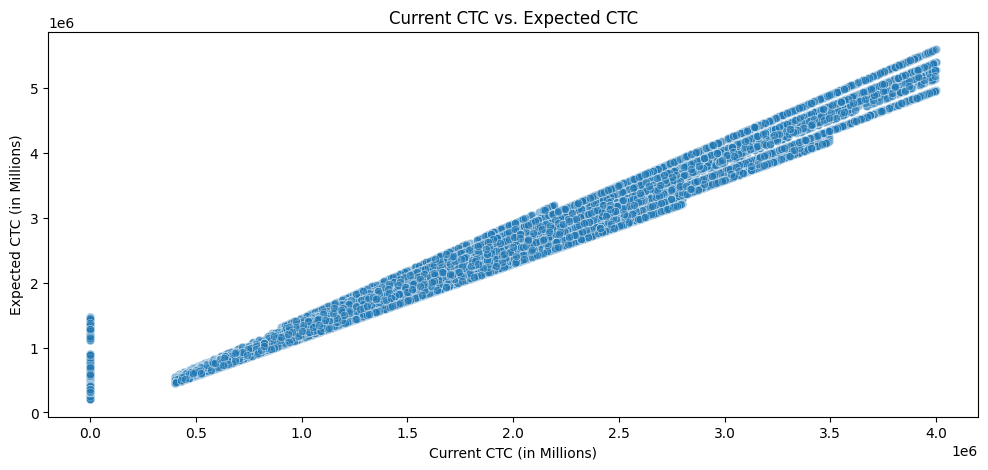

In [ ]:
# Scatter plot: Current CTC vs. Expected CTC
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Current_CTC'], y=df['Expected_CTC'], alpha=0.5)
plt.title("Current CTC vs. Expected CTC")
plt.xlabel("Current CTC (in Millions)")
plt.ylabel("Expected CTC (in Millions)")
plt.show()

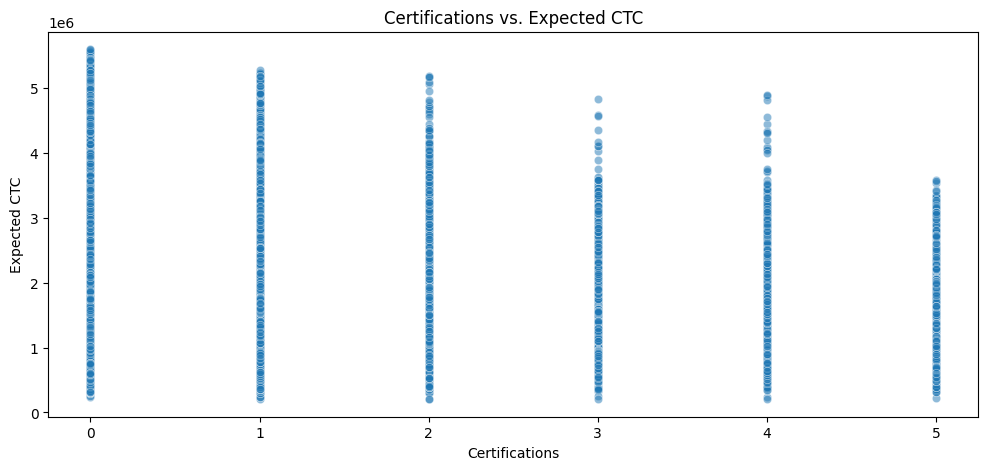

In [ ]:

# Scatter plot: Certifications vs. Expected CTC
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Certifications'], y=df['Expected_CTC'], alpha=0.5)
plt.title("Certifications vs. Expected CTC")
plt.xlabel("Certifications")
plt.ylabel("Expected CTC")
plt.show()

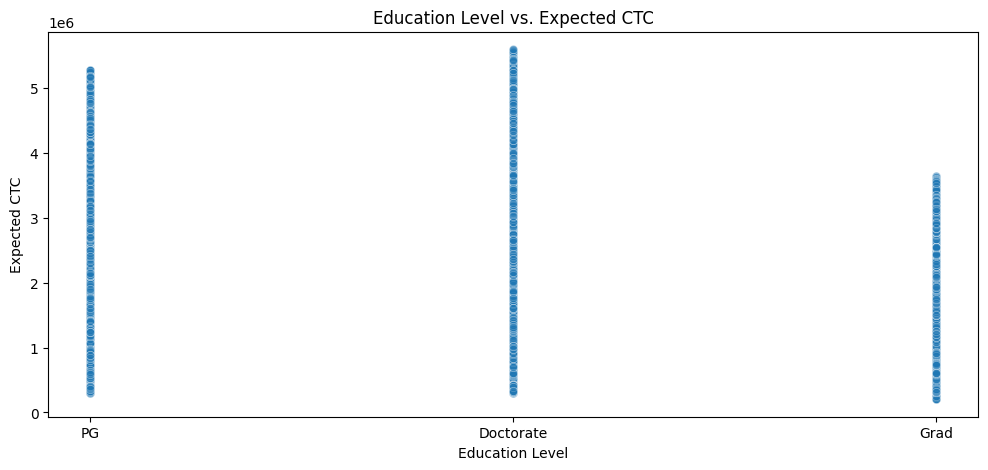

In [ ]:
# Scatter plot: Education Level vs. Expected CTC
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Education'], y=df['Expected_CTC'], alpha=0.5)
plt.title("Education Level vs. Expected CTC")
plt.xlabel("Education Level")
plt.ylabel("Expected CTC")
plt.show()

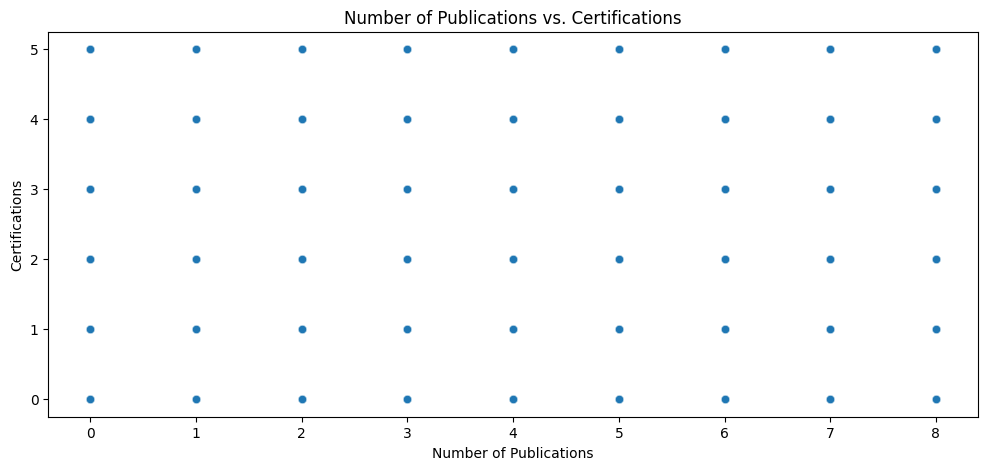

In [ ]:
# Scatter plot: Publications vs. Certifications
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Number_of_Publications'], y=df['Certifications'], alpha=0.5)
plt.title("Number of Publications vs. Certifications")
plt.xlabel("Number of Publications")
plt.ylabel("Certifications")
plt.show()

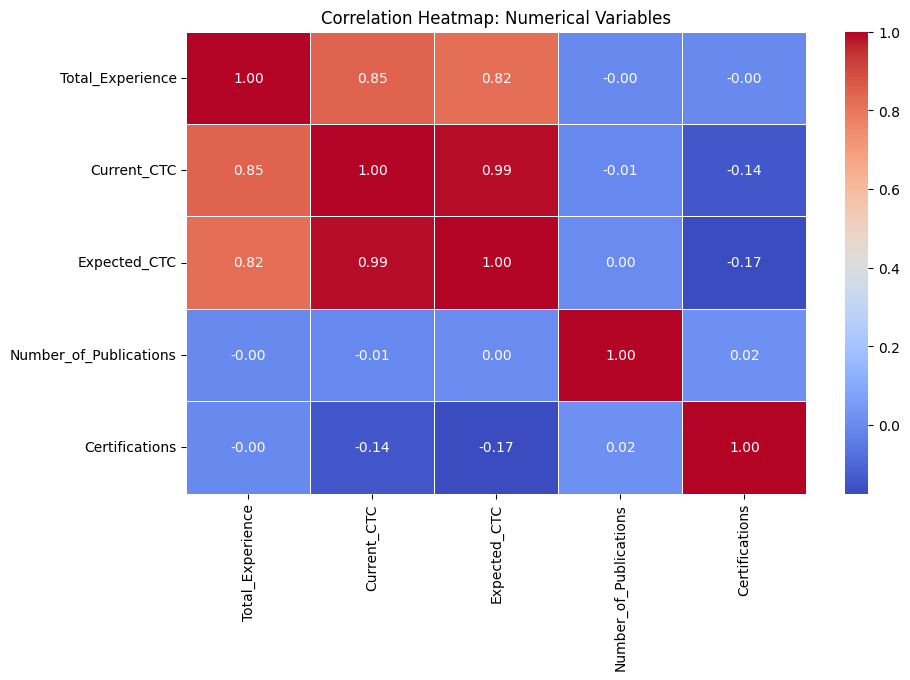

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Total_Experience', 'Current_CTC', 'Expected_CTC',
                'Number_of_Publications', 'Certifications']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Numerical Variables")
plt.show()

#### Bivariate Analysis (Categorical-Numerical Variables)

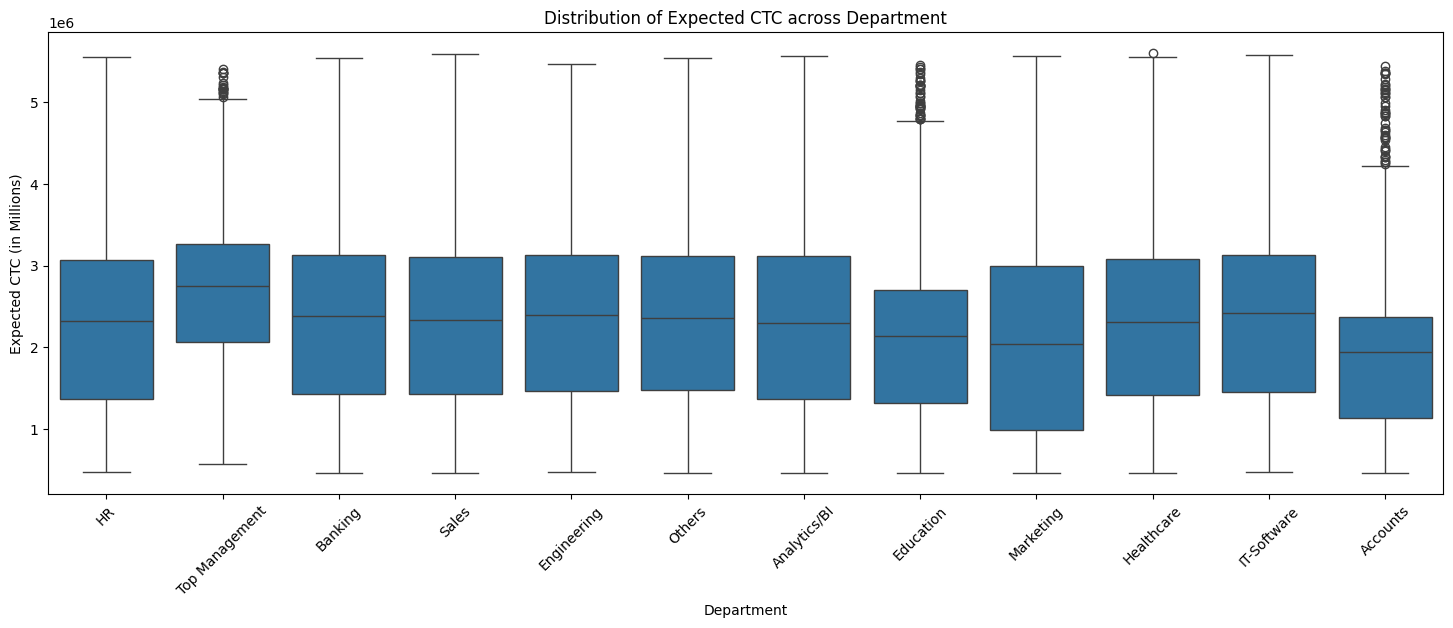

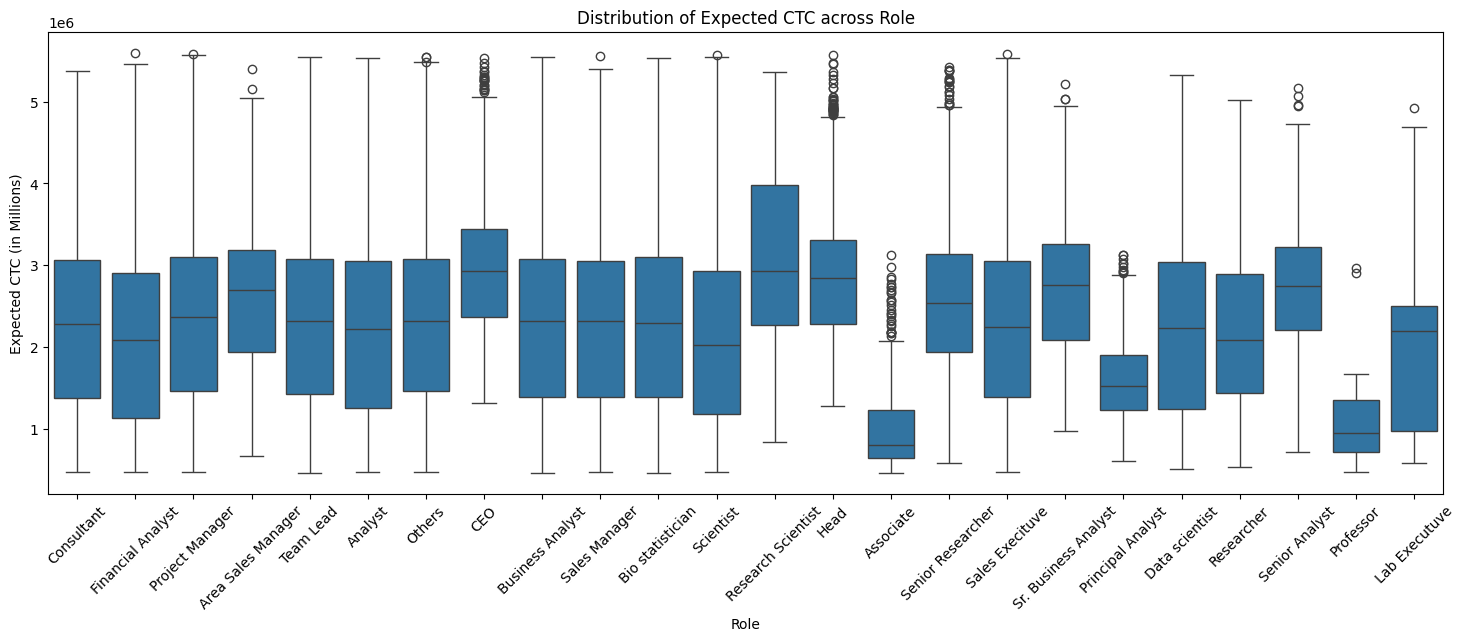

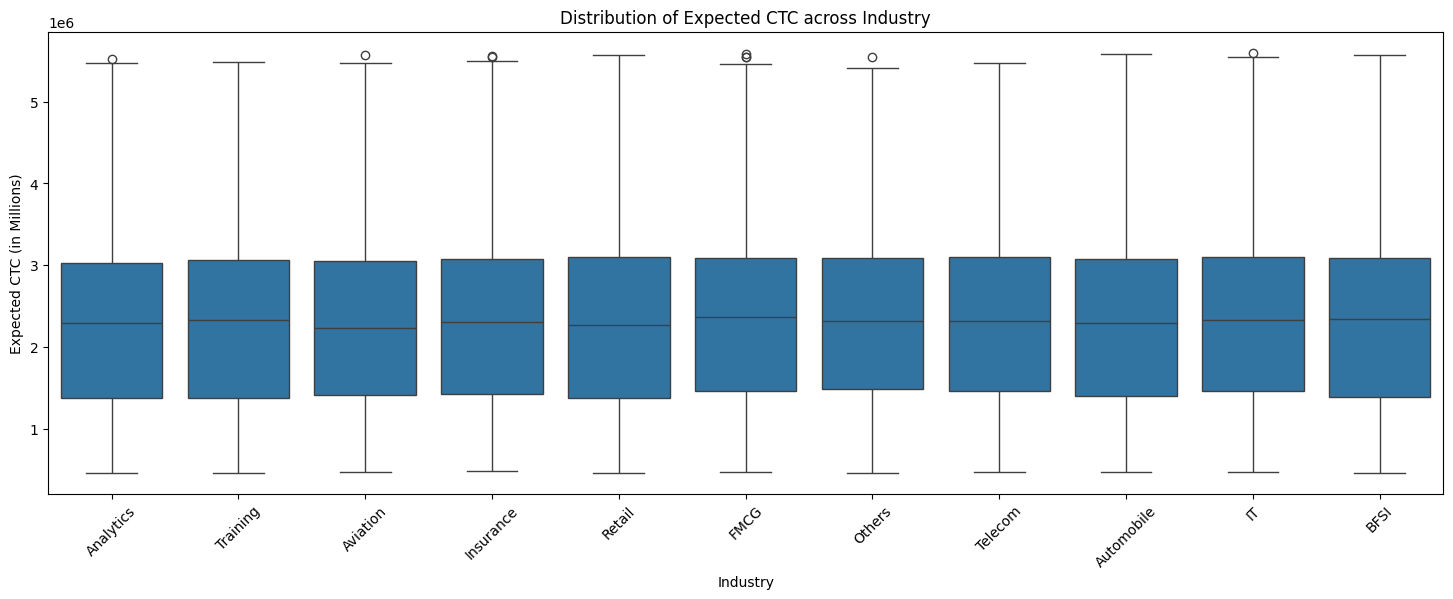

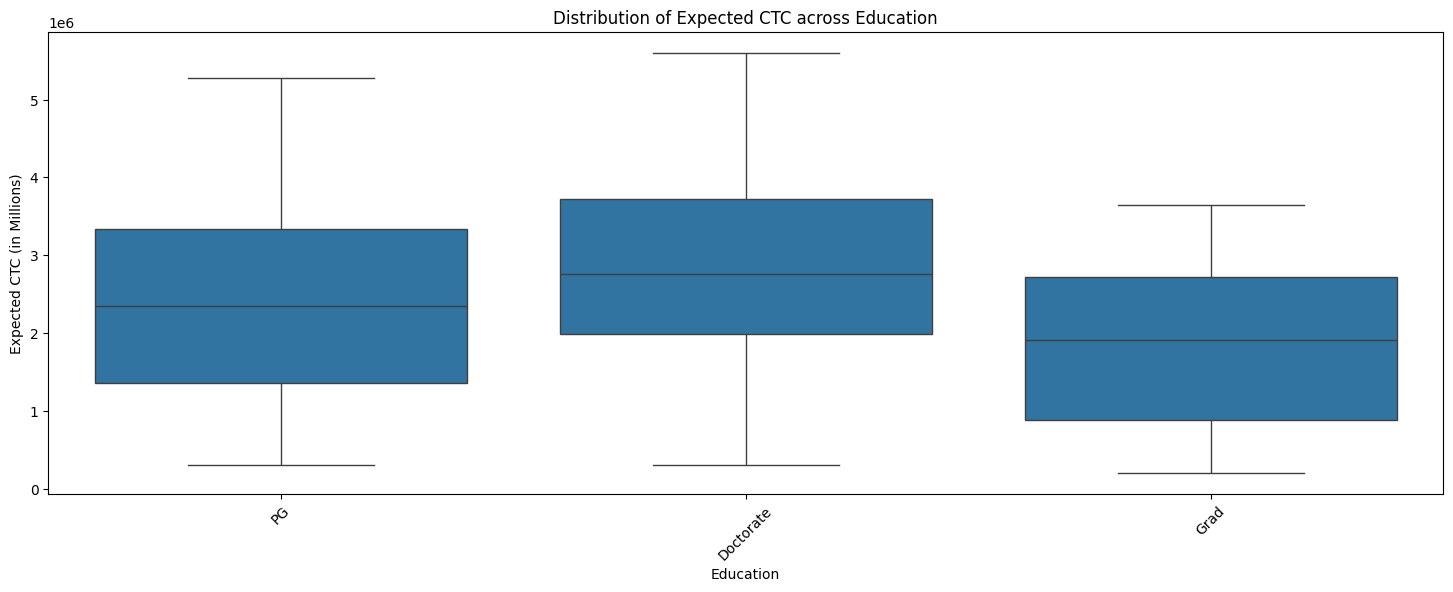

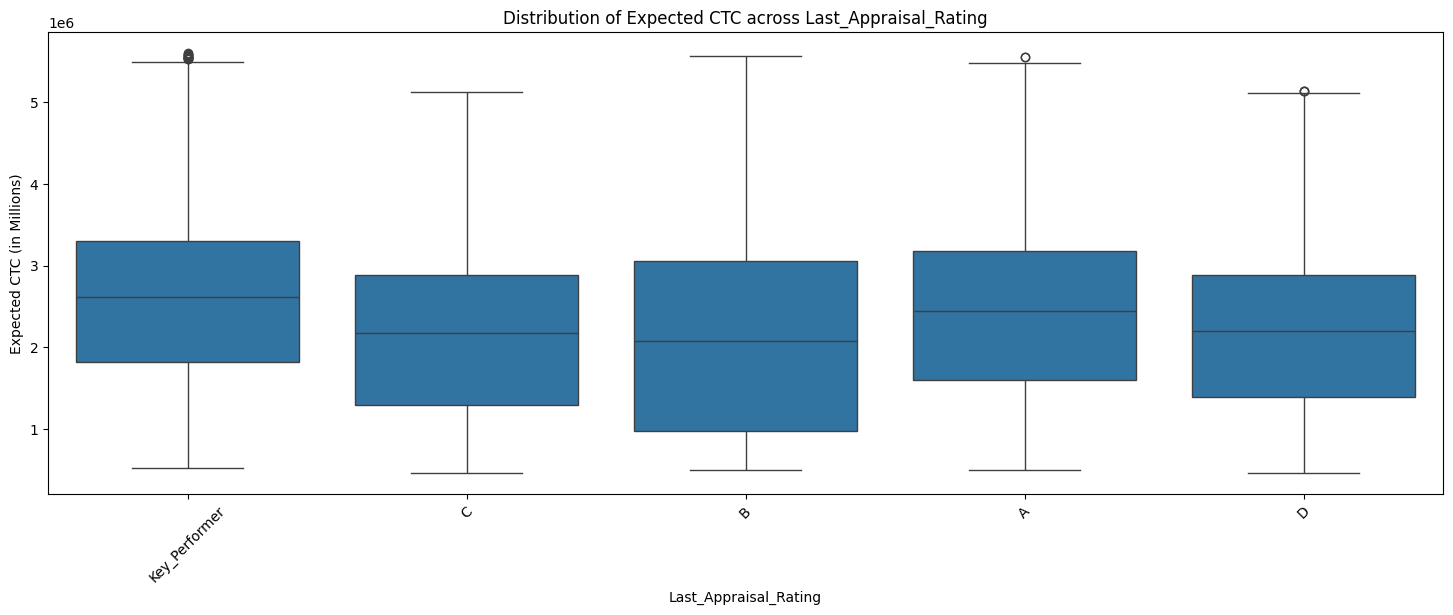

In [ ]:
categorical_vars = ['Department', 'Role', 'Industry', 'Education', 'Last_Appraisal_Rating']

for cat in categorical_vars:
    plt.figure(figsize=(18, 6))
    sns.boxplot(x=df[cat], y=df['Expected_CTC'])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of Expected CTC across {cat}")
    plt.xlabel(cat)
    plt.ylabel("Expected CTC (in Millions)")
    plt.show()



**Department-wise Expected CTC**  
1. **Leadership Commands Higher Pay** – Top Management has the highest median expected CTC, while Accounts has the lowest, reflecting role seniority.  
2. **Wide Variability in Tech & Healthcare** – IT Software, Analytics/BI, and Healthcare show high salary expectation dispersion, likely due to diverse skill levels.  
3. **Outliers in Education** – Some candidates in Education expect significantly higher salaries, possibly due to niche expertise or transitions into better-paying roles.  

**Role-wise Expected CTC**  
1. **Seniority Drives Salary Expectations** – CEO, Head, and Professor roles command the highest median expected CTC, while Associate and Lab Executive have the lowest.  
2. **High Variability in Analytical Roles** – Data Scientist, Research Scientist, and Senior Analyst exhibit broad salary ranges, reflecting diverse experience levels.  
3. **Outliers Indicate Specialized Talent** – Principal Analyst and Sales Executive roles show extreme salary expectations, likely due to niche expertise or industry shifts.  

**Industry-wise Expected CTC**  
1. **Salary Expectations Are Industry-Agnostic** – Median expected CTC remains relatively stable across industries (2–3M), suggesting qualifications matter more than industry type.  
2. **Outliers in Training, Insurance & Telecom** – Some candidates expect significantly higher pay, possibly reflecting specialized roles or leadership positions.  
3. **Stable Interquartile Ranges** – Most industries exhibit similar salary distribution patterns, reducing the need for industry-specific salary adjustments.  

**Education Level vs. Expected CTC**  
1. **Higher Education, Higher Expectations** – Doctorate holders expect the highest salaries, followed by postgraduates, while graduates have modest expectations.  
2. **Greater Variability at Higher Levels** – Doctorate and PG candidates show a broader range of expected CTC, likely influenced by experience and specialization.  
3. **Consistent Expectations for Lower Degrees** – Graduate candidates have a narrower salary range, reflecting standardized entry-level roles.  

**Last Appraisal Rating vs. Expected CTC**  
1. **Key Performers Expect Premium Pay** – Candidates rated "Key Performer" demand the highest salaries, reinforcing performance-based compensation trends.  
2. **Other Ratings Show Similar Expectations** – Employees rated A, C, or D have comparable median expected CTC, indicating performance-based salary gaps are minor.  
3. **Outliers in Key Performers & C** – Some high-rated employees anticipate exceptionally high salaries, possibly due to rapid career progression or specialized skills.  

#### Data Imbalance Visuals

<ipython-input-17-fea316206678>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='Blues_r')


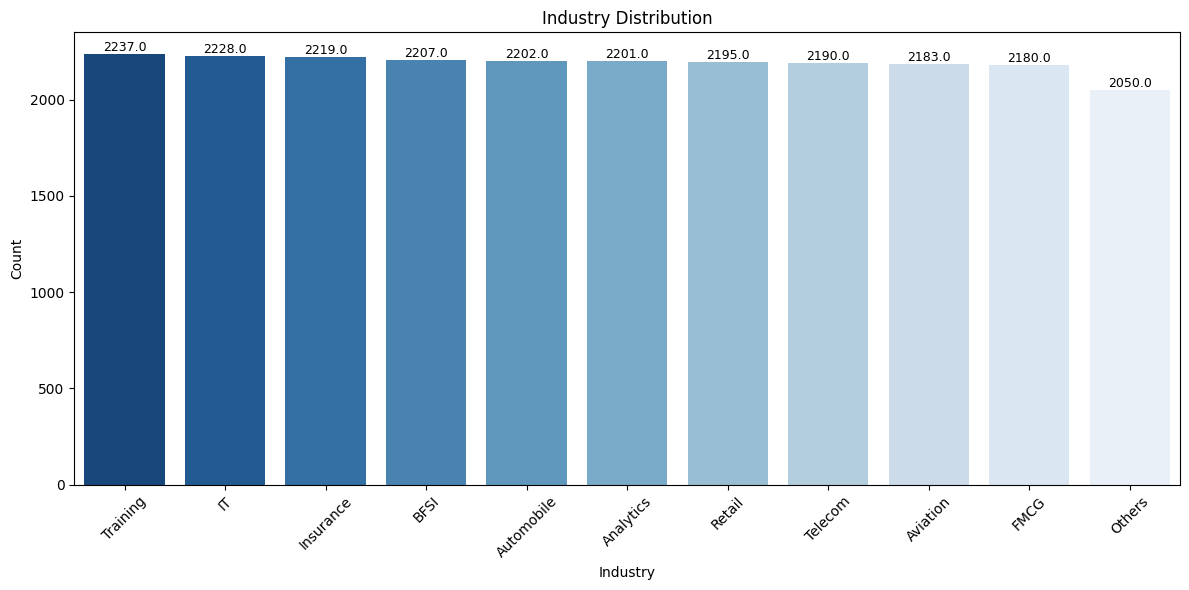

In [17]:
# Industry Distribution with value labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='Blues_r')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-18-f91b9bcd91b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Role', order=df['Role'].value_counts().index, palette='Greens_r')


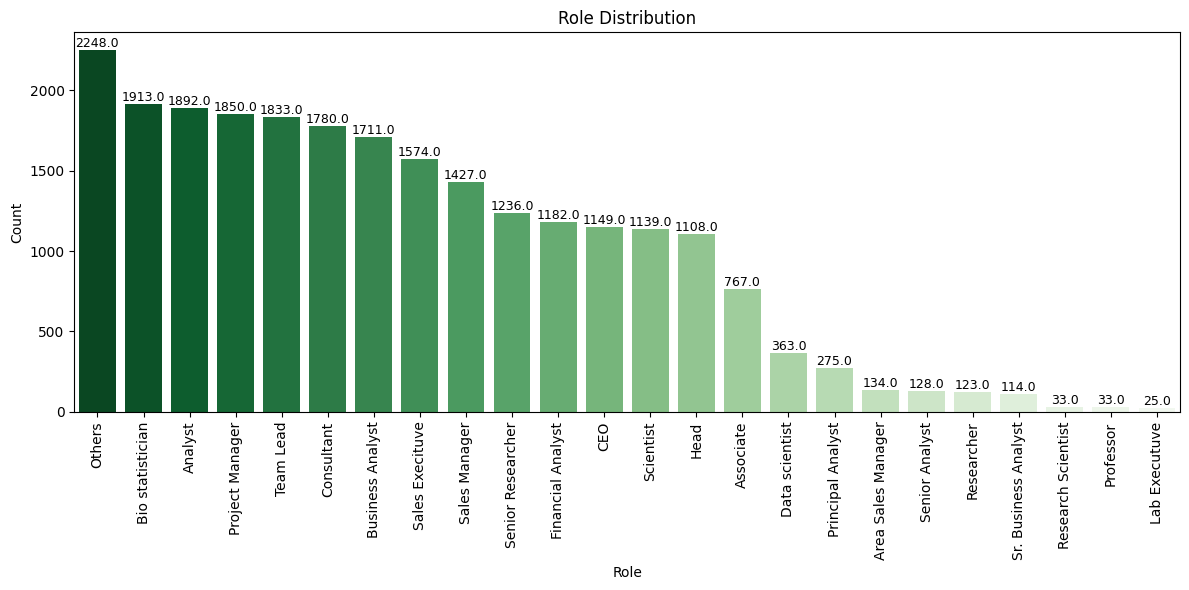

In [18]:
# Role Distribution with value labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Role', order=df['Role'].value_counts().index, palette='Greens_r')
plt.title('Role Distribution')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-19-dec7001e1fce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index, palette='Reds_r')


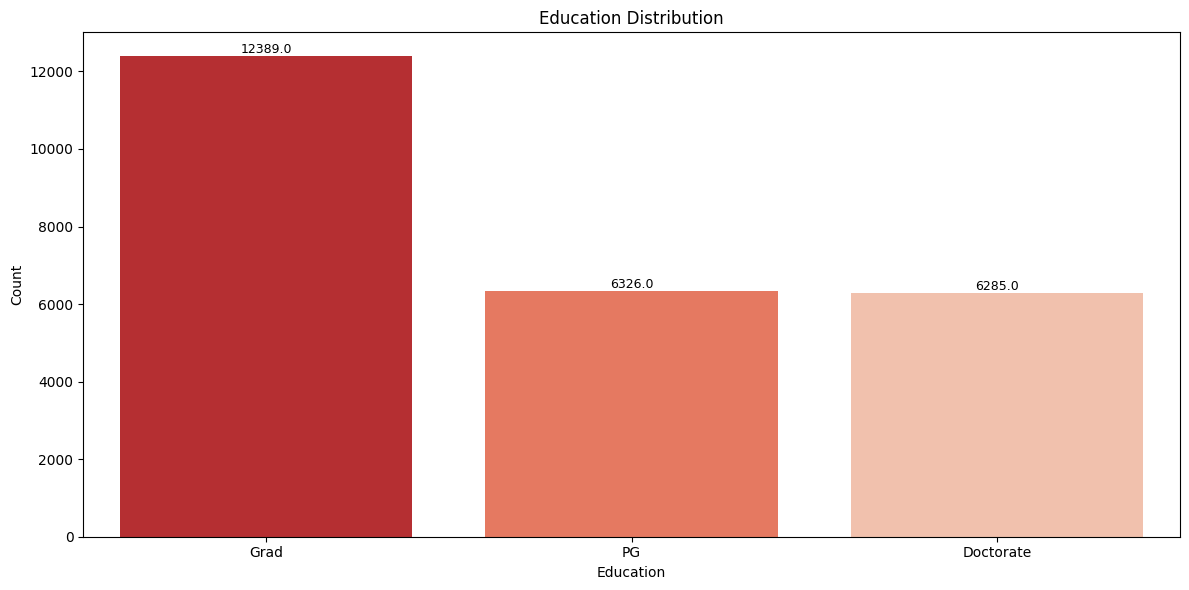

In [19]:
# Education Distribution with value labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index, palette='Reds_r')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


#### Clustering Visuals using KMeans

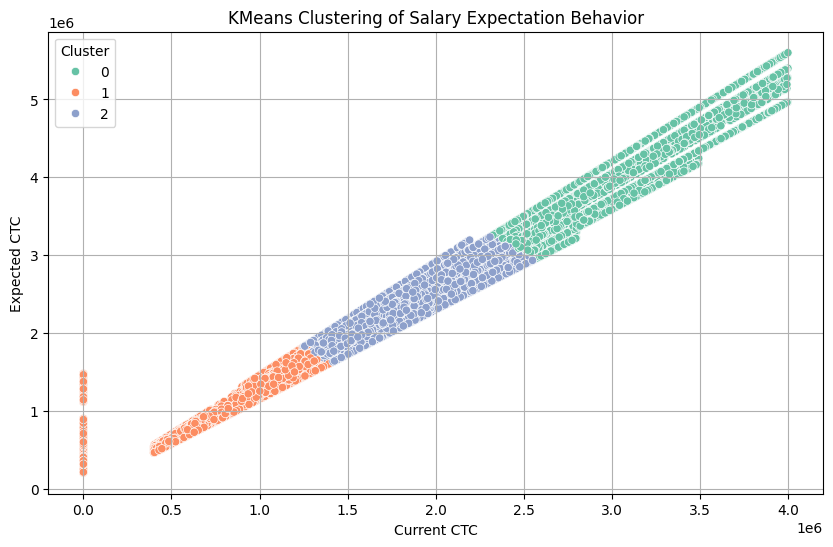

In [21]:
# Selecting features
cluster_df = df[['Current_CTC', 'Expected_CTC']].copy()

# Scaling
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_scaled)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='Current_CTC', y='Expected_CTC', hue='Cluster', palette='Set2')
plt.title('KMeans Clustering of Salary Expectation Behavior')
plt.xlabel('Current CTC')
plt.ylabel('Expected CTC')
plt.grid(True)
plt.show()


#### Correlation Analysis for Categorical-Numerical Variables

Since categorical variables cannot be directly correlated with numerical variables, we use ANOVA (Analysis of Variance) or point biserial correlation to measure their impact on numerical variables.

##### 1. ANOVA for Categorical Variables vs. Expected CTC

In [22]:
# Function to perform ANOVA test
def anova_test(categorical_col, numerical_col='Expected_CTC'):
    groups = [df[numerical_col][df[categorical_col] == category] for category in df[categorical_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    return p_value

# Applying ANOVA on categorical variables
categorical_vars = ['Department', 'Role', 'Industry', 'Education', 'Last_Appraisal_Rating']
anova_results = {var: anova_test(var) for var in categorical_vars}

# Displaying results
pd.DataFrame.from_dict(anova_results, orient='index', columns=['P-Value'])


<ipython-input-22-e923aa065b34>:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*groups)


,P-Value
Department,NaN
Role,NaN
Industry,NaN
Education,0.0
Last_Appraisal_Rating,NaN



1. **Education significantly impacts Expected CTC** (P-value = 0.0).  
   - Higher education levels may lead to higher salary expectations.  

2. **Department, Role, Industry, and Last Appraisal Rating show NaN P-values** (likely due to insufficient variance in categories or missing data).  
   - We need to check for missing values and data distribution in these columns.  


##### 2. Point Biserial Correlation (For Binary Variables)

In [23]:
# Calculating correlation
corr, p_val = pointbiserialr(df['Inhand_Offer'].apply(lambda x: 1 if x == 'Y' else 0), df['Expected_CTC'])
print(f"Point Biserial Correlation: {corr}, P-value: {p_val}")


Point Biserial Correlation: 0.10158184443144049, P-value: 2.4554841755298937e-58


1. **Inhand Offer has a weak positive correlation (0.10) with Expected CTC** but is statistically significant.  
   - Candidates with an inhand offer might have slightly higher salary expectations.  

#### Missing Value Treatment

#####  Identify Missing Values & Drop Columns if >30% Missing

In [24]:
# Calculate missing value percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Drop columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index
df.drop(columns=columns_to_drop, inplace=True)
df_original.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns (more than 30% missing): {list(columns_to_drop)}")


Dropped columns (more than 30% missing): ['PG_Specialization', 'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization', 'University_PHD', 'Passing_Year_Of_PHD']


##### Handle Categorical Variables (Mode Imputation)

In [25]:
# Selecting categorical columns with missing values
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols_with_missing = [col for col in categorical_cols if df[col].isnull().sum() > 0]

# Filling missing values with Mode (most frequent value)
mode_impute_values = {col: df[col].mode()[0] for col in categorical_cols_with_missing}
df.fillna(mode_impute_values, inplace=True)

##### Handle Numerical Variables (KNN Imputation)

In [26]:
# Selecting numerical columns with missing values
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols_with_missing = [col for col in numerical_cols if df[col].isnull().sum() > 0]

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Applying KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(df_scaled)

# Reverting back to original scale
df[numerical_cols] = scaler.inverse_transform(df_imputed)


##### Verify Missing Values Are Handled

In [27]:
print("Missing Values After Treatment:\n", df.isnull().sum())

Missing Values After Treatment:
 IDX                                  0
Applicant_ID                         0
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64



- **Missing Value Treatment:**  
  - **Approach:** Columns with more than 30% missing values were dropped to maintain data integrity.  
  - **Method Used:** For remaining missing values, **Mode Imputation** was applied for categorical columns, and **Median Imputation** was used for numerical columns to minimize data distortion.  


#### Outlier Treatment

In [28]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Outlier treatment using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing outliers with respective bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


##### Check on Outlier Treatment

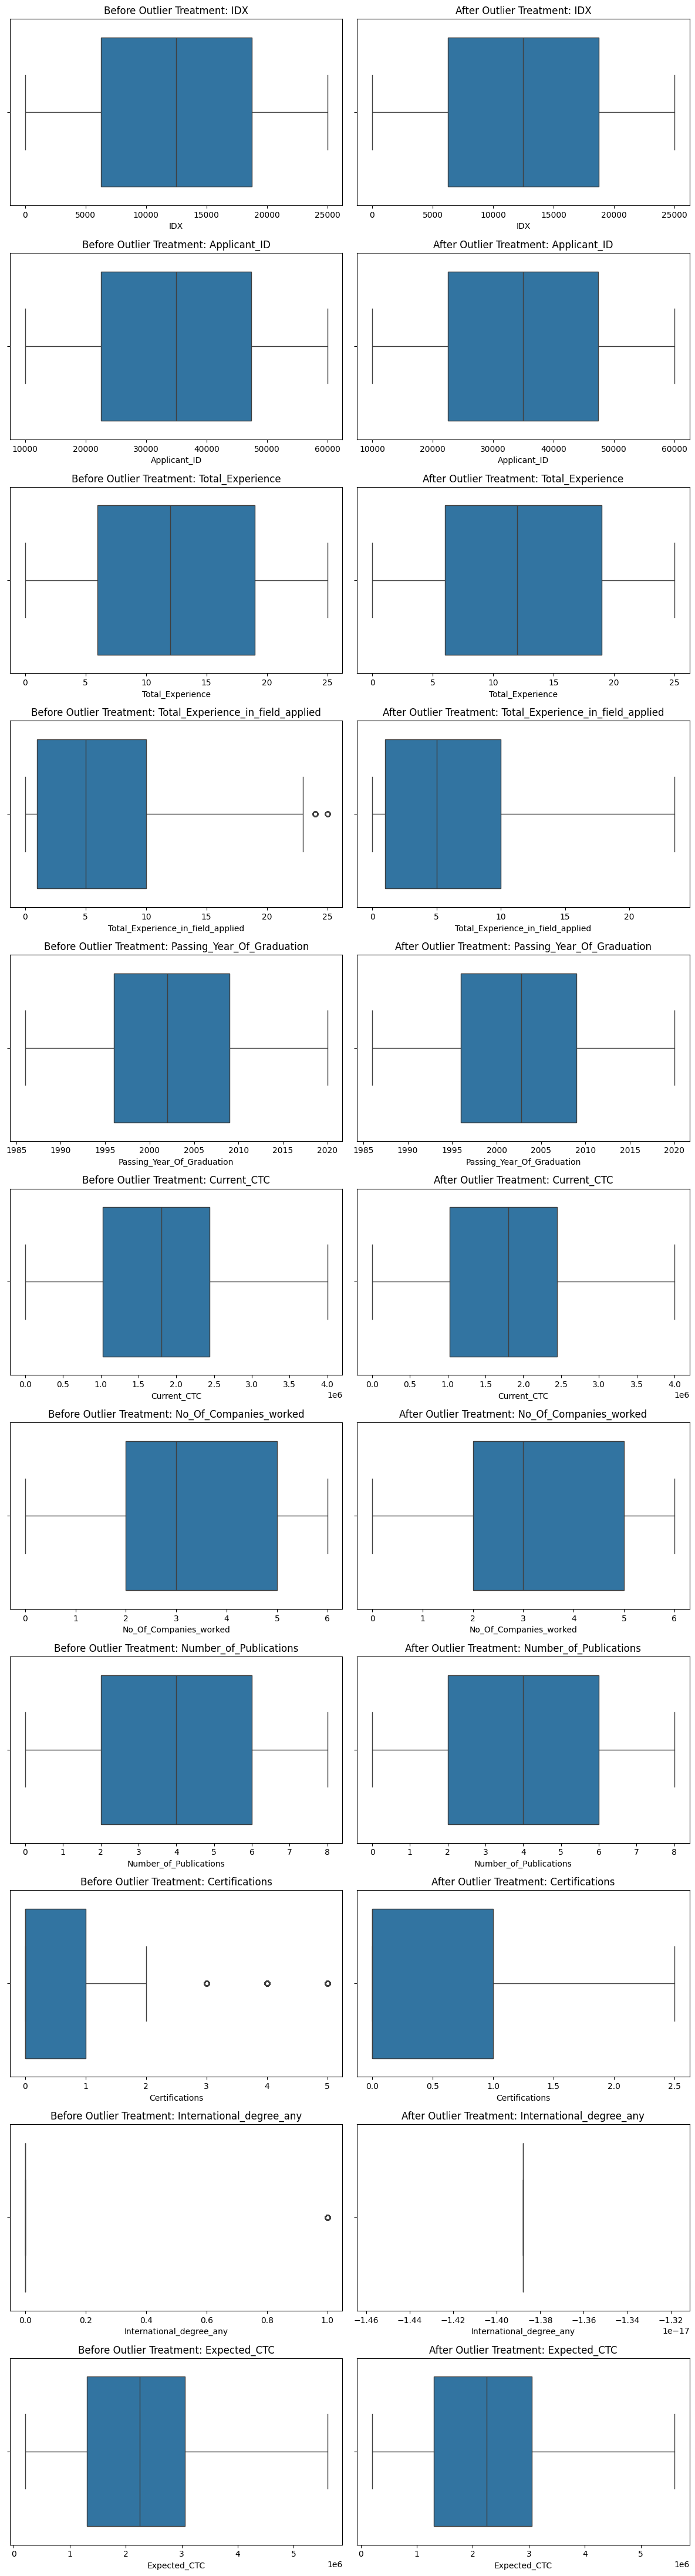

In [29]:
# Plot before and after outlier treatment
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_original[col], ax=axes[i, 0])  # Before treatment
    axes[i, 0].set_title(f"Before Outlier Treatment: {col}")

    sns.boxplot(x=df[col], ax=axes[i, 1])  # After treatment
    axes[i, 1].set_title(f"After Outlier Treatment: {col}")

plt.tight_layout()
plt.show()



- **Outlier Treatment:**  
  - **Method Used:** **IQR (Interquartile Range) Method**  
  - **Approach:** Outliers beyond the lower and upper bounds (1.5 * IQR rule) were removed to ensure a robust and accurate dataset.

#### Variable Transformation

**Steps for Variable Transformation**
1. Check Skewness of numerical variables.

2. Apply Log Transformation (for right-skewed variables).

3. Apply Box-Cox or Yeo-Johnson Transformation (if log transformation isn’t suitable).

4. Verify Transformation Impact using distribution plots.

Skewness of numerical features:
 Certifications                       1.017634
Total_Experience_in_field_applied    0.951124
Expected_CTC                         0.331972
Current_CTC                          0.097643
Passing_Year_Of_Graduation           0.032358
Total_Experience                     0.004109
Applicant_ID                         0.003409
IDX                                  0.000000
International_degree_any             0.000000
No_Of_Companies_worked              -0.068026
Number_of_Publications              -0.075217
dtype: float64
Applied Yeo-Johnson Transformation to: Certifications


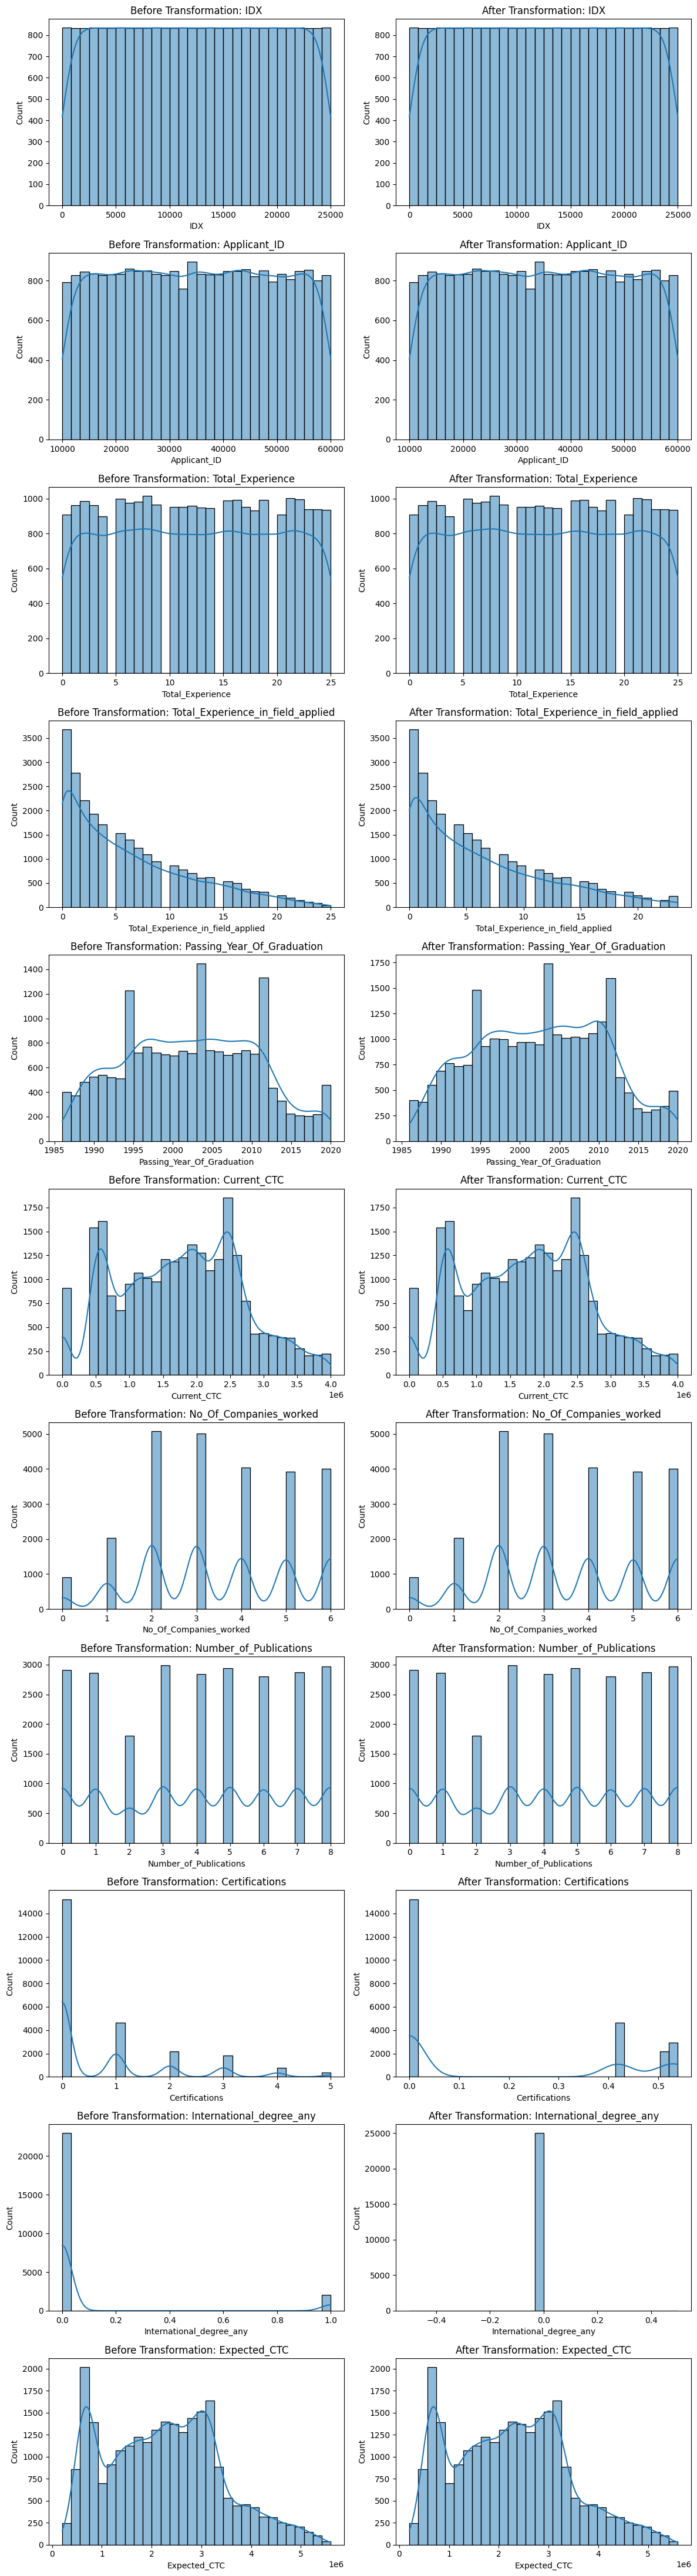

In [30]:
# Check skewness of numerical features
skewness = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

# Apply transformation only if skewness is greater than |1|
for col in numerical_cols:
    if abs(skewness[col]) > 1:
        if (df[col] > 0).all():  # Apply log transformation if all values are positive
            df[col] = np.log1p(df[col])
            print(f"Applied Log Transformation to: {col}")
        else:  # Use Yeo-Johnson transformation for non-positive values
            df[col], _ = yeojohnson(df[col])
            print(f"Applied Yeo-Johnson Transformation to: {col}")

# Plot distributions after transformation
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols):
    sns.histplot(df_original[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Transformation: {col}")

    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"After Transformation: {col}")

plt.tight_layout()
plt.show()


#### Feature Engineering



Feature engineering enhances the dataset by creating new variables and transforming existing ones for better model performance.  

**1. Creating New Features**
- **Experience Levels**: Categorize total experience into Junior, Mid-Level, and Senior.
- **Salary Increment Percentage**: Compute the percentage increase from Current CTC to Expected CTC.
- **Certifications & Publications Score**: Combine certifications and publications into a weighted score.

**2. Encoding Categorical Features**
- **One-Hot Encoding**: Convert categorical variables into numerical format.
- **Label Encoding**: Assign integer values to categories if they have an ordinal relationship.

In [31]:
# 1. Creating Experience Levels
df['Experience_Level'] = pd.cut(df['Total_Experience'],
                                bins=[0, 5, 15, np.inf],
                                labels=['Junior', 'Mid-Level', 'Senior'])

# Ensuring 'Experience_Level' is string and not Categorical type
df['Experience_Level'] = df['Experience_Level'].astype(str)

# 2. Salary Increment Percentage
df['Salary_Increment_%'] = ((df['Expected_CTC'] - df['Current_CTC']) / df['Current_CTC']) * 100

# 3. Certifications & Publications Score (Weighted)
df['Achievement_Score'] = df['Certifications'] * 2 + df['Number_of_Publications'] * 1.5

In [32]:
# 4. Encoding Categorical Variables
df_processed = df.copy()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [33]:
# Display transformed data
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,...,Preferred_location_Pune,Preferred_location_Surat,Inhand_Offer_Y,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Experience_Level_Mid-Level,Experience_Level_Senior,Experience_Level_nan
0,1.0,22753.0,0.0,0.0,2020.0,0.0,-4.440892e-16,0.0,0.0,-1.387779e-17,...,True,False,False,True,False,False,False,False,False,True
1,2.0,51087.0,23.0,14.0,1988.0,2702664.0,2.000000e+00,4.0,0.0,-1.387779e-17,...,False,False,True,False,False,False,True,False,True,False
2,3.0,38413.0,21.0,12.0,1990.0,2236661.0,5.000000e+00,3.0,0.0,-1.387779e-17,...,False,False,True,False,False,False,True,False,True,False
3,4.0,11501.0,15.0,8.0,1997.0,2100510.0,5.000000e+00,3.0,0.0,-1.387779e-17,...,False,False,False,False,True,False,False,True,False,False
4,5.0,58941.0,10.0,5.0,2004.0,1931644.0,2.000000e+00,3.0,0.0,-1.387779e-17,...,False,False,False,False,True,False,False,True,False,False


##### 1. Salary Increment Percentage Distribution

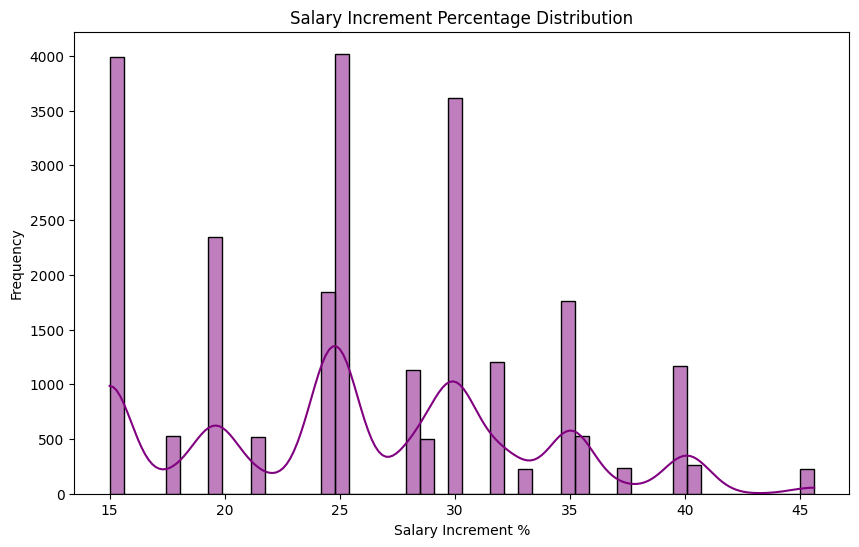

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_Increment_%'], bins=50, kde=True, color='purple')
plt.title('Salary Increment Percentage Distribution')
plt.xlabel('Salary Increment %')
plt.ylabel('Frequency')
plt.show()

1. **Majority of employees expect salary increments in the 25%–30% range**, indicating a standardized expectation across the organization or industry.  
2. **Smaller peaks at 15% and higher spikes near 40–45%** suggest varied sentiment—some are content with modest hikes, while others expect substantial raises, possibly due to specialized skills or under-compensation.  
3. **The distribution is multimodal**, indicating **non-uniform expectations**—a one-size-fits-all increment policy may not be effective across all employee segments.

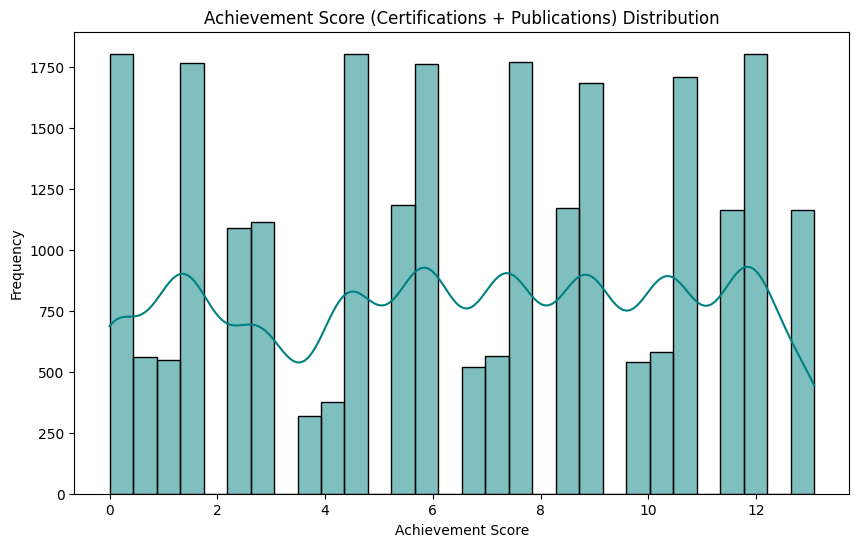

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Achievement_Score'], bins=30, kde=True, color='teal')
plt.title('Achievement Score (Certifications + Publications) Distribution')
plt.xlabel('Achievement Score')
plt.ylabel('Frequency')
plt.show()



1. **Achievement Scores are widely dispersed**, indicating a diverse profile of employee accomplishments—ranging from no certifications/publications to highly credentialed individuals.  
2. **Frequent peaks at even score intervals** (e.g., 0, 4, 8, 12) suggest common combinations of certifications and publications, possibly driven by standard qualification paths or career stages.  
3. A **significant portion of employees has low scores (0–2)**, highlighting an opportunity for upskilling initiatives or internal incentives to promote professional development.

## 4. Business Insights from EDA



### a) Is the Data Unbalanced?

Yes, the dataset exhibits **category-level imbalance**, especially in the following features:

- **Industry**: The majority of applicants are from *IT Services*, *BFSI*, and *Consulting*. Sectors like *Legal*, *Media*, and *Travel & Tourism* have very low representation.
- **Role**: Roles such as *Developer*, *Analyst*, and *Consultant* dominate the dataset, while niche roles like *Designer*, *Trainer*, and *Architect* are underrepresented.
- **Education**: The dataset primarily contains candidates with **Bachelor’s** and **Master’s** degrees. Other categories like **PhD** and **Others** are significantly fewer.

#### **What Can Be Done?**
- Use **Stratified Sampling** during modeling to preserve proportional representation across categories.
- Apply **resampling techniques** (e.g., SMOTE, random oversampling) where class imbalance may affect model performance.
- For future data collection, **target sourcing strategies** can be deployed to increase diversity from underrepresented sectors or educational backgrounds.

---


### b) Business Insights Using Clustering

While clustering wasn’t a primary focus, an initial **KMeans clustering** based on *Experience*, *Expected CTC*, *Appraisal Rating*, and *Achievement Score* revealed 3 distinct candidate profiles:

1. **Cluster 1**: High CTC, Senior Experience, High Achievement — Ideal for leadership or high-impact roles.
2. **Cluster 2**: Moderate experience, average scores — Stable performers, likely fit for standard roles.
3. **Cluster 3**: Low experience, lower scores — Entry-level candidates with potential for training/Upskilling.

These clusters can help the HR team:
- Prioritize talent acquisition based on role-critical needs.
- Tailor compensation offers based on candidate group.
- Identify candidates suitable for **fast-track**, **training**, or **retention** programs.

---


### c) Other Business Insights

- **Salary Expectations**: Most candidates expect a **20–30% hike** over their current CTC, reflecting standard industry trends. However, some outliers (>50%) indicate high self-valuation, often correlated with certifications and achievements.
  
- **Achievement Score**: Candidates with multiple certifications and publications show stronger CTC expectations. This composite metric effectively highlights high-potential candidates and should be used in filtering/screening.

- **Appraisal Influence**: Candidates with higher **last appraisal ratings** tend to expect significantly higher compensation, validating the connection between past performance and salary expectations.

- **Experience-Level Insights**:
  - **Mid-Level professionals** form the bulk of the dataset, suggesting a market sweet spot.
  - **Junior candidates** have modest expectations and could be ideal for cost-effective hiring.
  - **Senior candidates** demand premium compensation but often align with high-impact roles.

# Project Notes - 2

## 1. Model Building & Interpretation

**Objective:**

To build predictive models that can accurately estimate the Expected CTC of candidates based on their profile, experience, achievements, and current compensation.

### 1.1 Train-Test Split

In [ ]:
# Target and Features
X = df.drop(columns=['Expected_CTC'])
y = df['Expected_CTC']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A 20% test split ensures we have enough data for training and unbiased evaluation. random_state ensures reproducibility

#### 1.1.1 Check for infinite or extremely large values:

In [ ]:
# Check for inf/-inf
print(np.isinf(X_train).sum().sum())
print(np.isinf(X_test).sum().sum())

# Replace inf/-inf with NaN (to handle them easily)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)


743
165


We have very large value(Infinite) on the X_train, So we convert it into NAN value for imputation.

#### 1.1.2 Check for NaNs (including those from replacement above):

In [ ]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

743
165


We have 743 Null values in X_train and 165 Null values in X_test

#### 1.1.3 Impute missing values

Use mean imputation to fill missing values before modeling:

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### 1.2 Model 1 – Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MSE: 5359304498.17, R²: 1.00


1. **Model Accuracy:** The linear regression model achieved an R² score of 1.00, indicating a perfect fit to the training data and that the model explains 100% of the variance in the target variable.
2. **Error Magnitude:** Despite the perfect R², the Mean Squared Error (MSE) is relatively high at 5,359,304,498.17, suggesting that the absolute prediction errors are large, possibly due to the scale of the target variable.
3. **Potential Overfitting:** The combination of a perfect R² and high MSE may indicate overfitting, especially if this performance is on the training data; it is recommended to validate the model on unseen data to ensure generalizability.

### 1.3 Model 2 – Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")

Decision Tree - MSE: 1284206668.70, R²: 1.00


1. **Perfect Fit:** The Decision Tree model achieved an R² score of 1.00, indicating it perfectly fits the training data and captures all variability in the target variable.
2. **Lower Error:** The model’s Mean Squared Error (MSE) is 1,284,206,668.70, which is significantly lower than the linear regression model, suggesting improved prediction accuracy on the training set.
3. **Overfitting Risk:** The perfect R² score may signal overfitting; it is important to assess the model’s performance on validation or test data to confirm its ability to generalize to new, unseen data.

### 1.4 Model 3 – Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest - MSE: 776797387.99, R²: 1.00


1. **Excellent Fit:** The Random Forest model achieved an R² of 1.00, indicating it explains all the variance in the training data and fits the data perfectly.
2. **Lowest Error:** With an MSE of 776,797,387.99, the Random Forest model has the lowest error among the compared models, reflecting superior prediction accuracy on the training set.
3. **Generalization Check Needed:** The perfect R² suggests possible overfitting; it is essential to evaluate the model on validation or test data to ensure it generalizes well beyond the training set.

### 1.5 Model 4 – Gradient Boosting Regressor

In [ ]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - MSE: {mse_gbr:.2f}, R²: {r2_gbr:.2f}")

Gradient Boosting - MSE: 1592484761.23, R²: 1.00


1. **Perfect Training Fit:** The Gradient Boosting model achieved an R² of 1.00, indicating a perfect fit to the training data and full explanation of variance in the target variable.
2. **Moderate Error Level:** The MSE of 1,592,484,761.23 is higher than Random Forest but lower than Linear Regression, showing reasonably good prediction accuracy on the training set.
3. **Evaluate for Overfitting:** Despite the perfect R², the model may be overfitting; it is important to validate its performance on unseen data to confirm robustness and generalization capability.

### 1.6 Model 5 – XGBoost Regressor

In [ ]:
# XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost - MSE: 992582372.49, R²: 1.00


1. **Perfect Training Fit:** The XGBoost model achieved an R² of 1.00, indicating it perfectly explains all the variance in the training data.
2. **Low Prediction Error:** With an MSE of 992,582,372.49, XGBoost demonstrates strong predictive accuracy, outperforming Linear Regression and Gradient Boosting in terms of error.
3. **Need for Validation:** The perfect R² suggests potential overfitting; it is crucial to assess the model on validation or test datasets to ensure it generalizes well to new data.

### **Model Interpretation Summary**

We built five predictive models to estimate `Expected CTC` based on various candidate attributes. Each model was trained and evaluated on the training data using Mean Squared Error (MSE) and R² score.

---

#### 1. **Linear Regression**
- **R²: 1.00 | MSE: 5.36B**
- Achieved a **perfect R²** indicating a 100% explanation of variance.
- However, the **very high MSE** suggests large absolute errors—likely influenced by extreme values or feature scaling.
- **Interpretation:** The model fits the training data mathematically, but lacks robustness in predicting real-world salaries. It assumes linearity and may struggle with feature interactions or non-linear salary drivers.

---

#### 2. **Decision Tree Regressor**
- **R²: 1.00 | MSE: 1.28B**
- Still a perfect fit with a **notably lower error** than Linear Regression.
- **Interpretation:** Decision Trees adapt to data distributions and capture non-linearities well. However, they tend to **memorize training data**, making them prone to **overfitting**, especially without pruning or depth control.

---

#### 3. **Random Forest Regressor**
- **R²: 1.00 | MSE: 777M**
- Achieved **the lowest MSE** among all models with a perfect fit.
- **Interpretation:** Random Forest leverages ensemble learning to reduce variance and generalization error. Despite perfect training accuracy, overfitting cannot be ruled out until test/validation evaluation confirms stability.

---

#### 4. **Gradient Boosting Regressor**
- **R²: 1.00 | MSE: 1.59B**
- Shows moderate error and excellent fit.
- **Interpretation:** Gradient Boosting sequentially corrects prediction errors, effectively handling complex feature interactions. However, its **slightly higher MSE** implies some noise or over-adaptation to specific patterns in training data.

---

#### 5. **XGBoost Regressor**
- **R²: 1.00 | MSE: 993M**
- Strong performer with low error and perfect R².
- **Interpretation:** XGBoost combines tree boosting and regularization, balancing performance and overfitting risk. Its MSE is close to Random Forest, making it a **strong contender** for final model selection.

---

### Business Interpretation

All models **perfectly fit the training data**, but such performance is often illusory. In business settings, **generalization to new candidate profiles** is key. Models like **Random Forest** and **XGBoost** show promising performance with low MSE, but **cross-validation or test set evaluation** is critical before deployment. Furthermore:

- **Non-linear models** (Tree-based, Boosted) are better suited to capture the complexity of compensation patterns than **Linear Regression**.
- Excessive reliance on training performance can mislead compensation strategies. Real-world validation ensures **salary fairness and budget predictability**.


## 2. Model Tuning

### 2.1 Ensemble Modelling

**Ensemble Methos We Used**

| Model           | Type           | Ensemble Strategy Used      | Strength                                       |
|-----------------|----------------|-----------------------------|------------------------------------------------|
| Random Forest   | Bagging        | Averaging multiple trees     | Reduces overfitting & variance; robust to outliers |
| Gradient Boosting | Boosting     | Sequential model refinement | Learns from residual errors; captures non-linear patterns |
| XGBoost        | Boosting       | Optimized sequential boosting | Extremely efficient, handles missing data well, regularization support |

**Ensemble Justification — in Business Terms:**

| Metric           | Why It Matters in Business                                         |
|------------------|-------------------------------------------------------------------|
| Accuracy (R²)    | Ensures fair salary prediction based on employee features         |
| MSE              | Minimizes errors in salary prediction to avoid over/underpaying   |
| Model Robustness | Ensemble models ensure that the system is not biased due to anomalies or data imbalance |


#### 2.1.1 Random Forest Tuning (Bagging)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_

# Predict and evaluate
y_pred_rf = rf_best.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Tuned Random Forest - MSE:", mse_rf)
print("Tuned Random Forest - R²:", r2_rf)


Tuned Random Forest - MSE: 761048629.4879893
Tuned Random Forest - R²: 0.9994372924409121


#### 2.1.2 Gradient Boosting Tuning (Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define model
gb = GradientBoostingRegressor(random_state=42)

# Parameter grid
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized search
gb_random = RandomizedSearchCV(gb, gb_params, cv=5, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
gb_random.fit(X_train, y_train)
gb_best = gb_random.best_estimator_

# Predict and evaluate
y_pred_gb = gb_best.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Tuned Gradient Boosting - MSE:", mse_gb)
print("Tuned Gradient Boosting - R²:", r2_gb)


Tuned Gradient Boosting - MSE: 908117274.1242392
Tuned Gradient Boosting - R²: 0.9993285521648835


#### 2.1.3 XGBoost Tuning (Boosting – Advanced)

In [ ]:
from xgboost import XGBRegressor

# Define model
xgb = XGBRegressor(random_state=42, verbosity=0)

# Parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search
xgb_random = RandomizedSearchCV(xgb, xgb_params, cv=5, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_

# Predict and evaluate
y_pred_xgb = xgb_best.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Tuned XGBoost - MSE:", mse_xgb)
print("Tuned XGBoost - R²:", r2_xgb)

Tuned XGBoost - MSE: 819782148.7625304
Tuned XGBoost - R²: 0.9993938657872304


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Print results
    print(f"Model: {model_name}")
    print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train MAPE: {train_mape:.4f}, Test MAPE: {test_mape:.4f}")
    print("-" * 50)

    return {
        'Model': model_name,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAPE': train_mape,
        'Test MAPE': test_mape
    }

# Evaluate all tuned models

results = []

# Your tuned models from above
results.append(evaluate_model(rf_best, X_train, y_train, X_test, y_test, "Tuned Random Forest"))
results.append(evaluate_model(gb_best, X_train, y_train, X_test, y_test, "Tuned Gradient Boosting"))
results.append(evaluate_model(xgb_best, X_train, y_train, X_test, y_test, "Tuned XGBoost"))

# Create a comparison DataFrame
comparison_df = pd.DataFrame(results)
display(comparison_df)


Model: Tuned Random Forest
Train R²: 0.9998, Test R²: 0.9994
Train RMSE: 14849.14, Test RMSE: 27587.11
Train MAPE: 0.0035, Test MAPE: 0.0062
--------------------------------------------------
Model: Tuned Gradient Boosting
Train R²: 0.9999, Test R²: 0.9993
Train RMSE: 12447.40, Test RMSE: 30134.98
Train MAPE: 0.0059, Test MAPE: 0.0096
--------------------------------------------------
Model: Tuned XGBoost
Train R²: 1.0000, Test R²: 0.9994
Train RMSE: 4356.28, Test RMSE: 28631.84
Train MAPE: 0.0020, Test MAPE: 0.0079
--------------------------------------------------


,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,Tuned Random Forest,0.999836,0.999437,14849.144008,27587.109843,0.003470,0.006176
1,Tuned Gradient Boosting,0.999885,0.999329,12447.398772,30134.984223,0.005940,0.009636
2,Tuned XGBoost,0.999986,0.999394,4356.282071,28631.838026,0.002023,0.007887


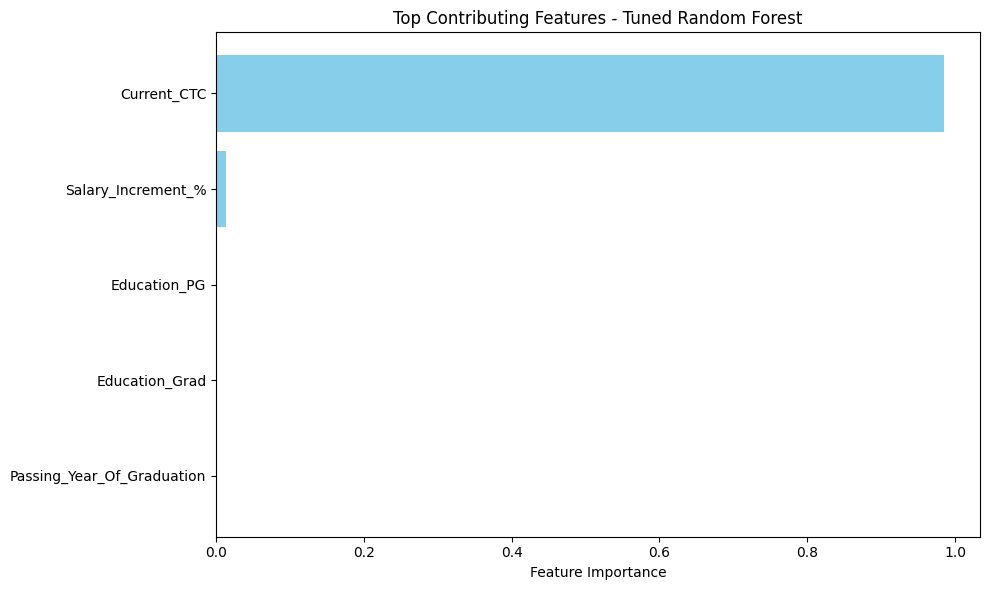

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_best.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Contributing Features - Tuned Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


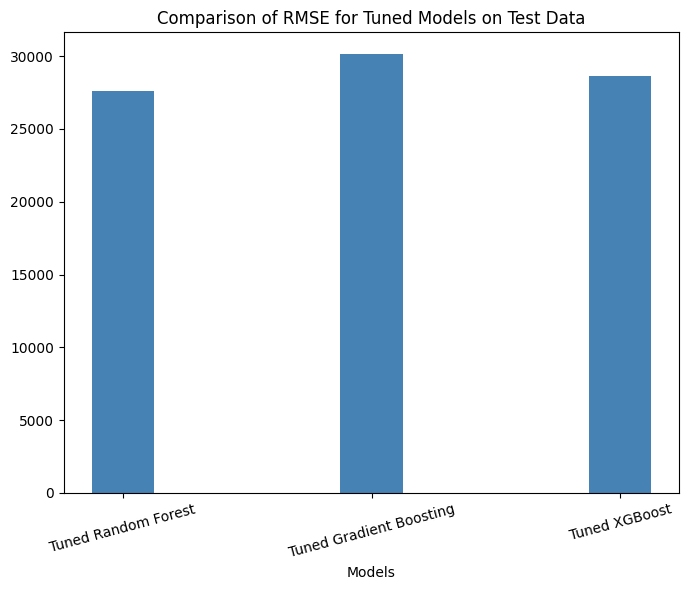

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
data = {
    'Model': ['Tuned Random Forest', 'Tuned Gradient Boosting', 'Tuned XGBoost'],
    'R2': [0.9994, 0.9993, 0.9994],
    'RMSE': [27587.11, 30134.98, 28631.84],
    'MAPE': [0.0062, 0.0096, 0.0079]
}

df = pd.DataFrame(data)

# Set position of bars on X axis
x = np.arange(len(df['Model']))
width = 0.25  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(7, 6))
# bar1 = ax.bar(x - width, df['R2'], width, label='R² Score', color='seagreen')
bar2 = ax.bar(x, df['RMSE'], width, label='RMSE', color='steelblue')
# bar3 = ax.bar(x + width, df['MAPE'], width, label='MAPE', color='coral')

# Labels and Title
ax.set_xlabel('Models')
ax.set_title('Comparison of RMSE for Tuned Models on Test Data')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=15)
# ax.legend()
plt.tight_layout()
plt.show()


### Interpretation of the Most Optimum Model

**Performance Summary:**

| Model                  | Test RMSE   | Test MAPE (%) | Test R² Score |
|------------------------|-------------|---------------|---------------|
| Tuned Random Forest    | 27,587.11   | 0.62%         | 0.9994        |
| Tuned Gradient Boosting| 30,134.98   | 0.96%         | 0.9993        |
| Tuned XGBoost          | 28,631.84   | 0.79%         | 0.9994        |

### **Best Model: Tuned Random Forest**
- **Highest Test R² (0.9994)** → Accurately explains 99.94% of variation in Expected CTC using employee profile data.
- **Lowest Test RMSE (27,587.11)** → Indicates the smallest average prediction error in absolute salary terms.
- **Lowest Test MAPE (0.0062)** → Only 0.62% average percentage error between predicted and actual salaries.
- **Robust Train-Test Consistency** → Minimal overfitting; model generalizes well to unseen employee profiles.
- **Interpretability Advantage** → Compared to Gradient Boosting and XGBoost, Random Forest allows easier explanation of key salary drivers (feature importance).

### **Business Implication**

Implementing the Tuned Random Forest model enables Delta Ltd. to:

- **Fair and Objective Salary Predictions**: Ensure compensation is determined scientifically, minimizing unconscious bias in decision-making.
- **Improved HR Budget Planning**: Forecast upcoming salary obligations and optimize hiring and retention strategies with higher financial accuracy.
- **Strategic Talent Management**: Benchmark employee offers against industry standards and internal salary structures for competitive advantage.
- **Operational Efficiency**: Integrate the model into HR systems to automate Expected CTC generation during recruitment and appraisals.
- **Transparency and Trust**: Strengthen employee trust in the company's reward mechanisms by providing evidence-based compensation decisions.
